<center><h1> 💵MOBILE PHONE PRICE📱 </h1></center>

<a id="import"></a>
# 1️⃣ㅣImport Libraries

In [2]:
#Import libraries
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.offline as pyo
from plotly.offline import iplot
import plotly.express as px
from plotly.subplots import make_subplots

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model performance
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import  KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve , accuracy_score
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#warnings
#import warnings
#warnings.simplefilter(action='ignore')

#plt.style.use ('seaborn')
#from sklearn.pipeline import Pipeline


<a id="data"></a>
# 2️⃣ㅣLoad data💾 

In [3]:
#loading data 
data= pd.read_csv("mobile_prices.csv")
df=pd.DataFrame(data)
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [6]:
# lists name of columns
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

- battery_power : Énergie totale qu'une batterie peut stocker en une seule fois, mesurée en mAh.
- blue : A-t-il Bluetooth ou non ?
- clock_speed : Vitesse à laquelle le microprocesseur exécute les instructions.
- dual_sim : A-t-il la prise en charge de la double SIM ou non ?
- fc : Méga pixels de la caméra frontale.
- four_g : A-t-il la 4G ou non ?
- int_memory : Mémoire interne en Gigaoctets.
- m_dep : Profondeur du mobile en cm.
- mobile_wt : Poids du téléphone mobile.
- n_cores : Nombre de cœurs du processeur.
- pc : Méga pixels de la caméra principale.
- px_height : Hauteur de la résolution des pixels.
- px_width : Largeur de la résolution des pixels.
- ram : Mémoire vive (RAM) en Mo.
- sc_h : Hauteur de l'écran du mobile en cm.
- sc_w : Largeur de l'écran du mobile en cm.
- talk_time : Temps le plus long qu'une seule charge de batterie peut durer lors de l'utilisation du téléphone.
- three_g : A-t-il la 3G ou non ?
- touch_screen : A-t-il un écran tactile ou non ?
- wifi : A-t-il le Wi-Fi ou non ?
- price_range : C'est la variable cible avec les valeurs 0 (bas coût), 1 (coût moyen), 2 (haut coût) et 3 (très haut coût).

In [7]:
df=pd.DataFrame(data)
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

### <a id="eda"></a>
# 3️⃣ ㅣData Preprocessing

In [8]:
#to view some basic statistical details of train data
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

- La fonction `data.describe` renvoie un résumé du jeu de données. Ici :

- La colonne `count` signifie le nombre de valeurs dans chaque colonne.

- La colonne `mean` signifie la valeur moyenne ou la moyenne des colonnes numériques.

- `std` signifie une mesure de la dispersion des données par rapport à la moyenne ou à quelle distance chaque valeur est de la valeur moyenne.

- Les colonnes `min` et `max` représentent respectivement les valeurs minimales et maximales.

- Les colonnes `25%`, `50%`, et `75%` signifient que si nous avons 100 valeurs triées, alors les données des 25e, 50e et 75e pourcentiles sont données. Si la valeur moyenne et la valeur des 50% ne sont pas les mêmes ou s'il y a une grande différence, cela signifie que les données doivent être biaisées (skewed).


In [10]:
# checking the number of rows and columns in train dataset
rows,col=df.shape
print ('Row:' , rows,'\nColumns:',col)

Row: 2000 
Columns: 21


#### This dataset contais 21 columns and 2000 informations or rows

In [11]:
#number of null values in our train dataset
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### .isnull() function returns is there any null value in any column

- In this dataset there is no Null value

In [12]:
#getting some information about the datafram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

- La fonction .info renvoie le type de chaque colonne ainsi que la taille du dataset.
- Dans ce dataset, à l'exception de clock_speed et m_dep, le type de chaque colonne est un entier (int).

In [13]:
#To check number of uniqe elements in each columns.
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

- Nous allons diviser les variables en catégories et continues, les analyser et en tirer des conclusions.

In [14]:
df.min()

battery_power    501.0
blue               0.0
clock_speed        0.5
dual_sim           0.0
fc                 0.0
four_g             0.0
int_memory         2.0
m_dep              0.1
mobile_wt         80.0
n_cores            1.0
pc                 0.0
px_height          0.0
px_width         500.0
ram              256.0
sc_h               5.0
sc_w               0.0
talk_time          2.0
three_g            0.0
touch_screen       0.0
wifi               0.0
price_range        0.0
dtype: float64

Observation :
- Il y a des valeurs égales à zéro dans les colonnes "px_height" et "sc_w". Le problème avec ces points est qu'ils ne peuvent pas représenter une caractéristique d'un téléphone mobile, car il n'existe pas de pixel 1D ni d'écran 1D !

In [4]:
# Création d'un masque pour repérer les lignes où la hauteur des pixels ('px_height') est égale à 0
px_mask = df['px_height'] == 0

# Création d'un masque pour repérer les lignes où la largeur de l'écran ('sc_w') est égale à 0
sc_mask = df['sc_w'] == 0

# Affichage du nombre de valeurs égales à 0 dans la colonne 'px_height'
print(f'pixel height = 0  :  {sum(px_mask)}')

# Affichage du nombre de valeurs égales à 0 dans la colonne 'sc_w' (screen width)
print(f'screen width = 0  :  {sum(sc_mask)}')


pixel height = 0  :  2
screen width = 0  :  180


In [5]:
# Filtrer les données pour ne conserver que les lignes où la largeur de l'écran (sc_w) est supérieure ou égale à 2
df = df[df['sc_w'] >= 2]

# Filtrer les données pour ne conserver que les lignes où la hauteur des pixels (px_height) est strictement supérieure à 0
df = df[df['px_height'] > 0]

# Réinitialiser les indices du DataFrame après avoir effectué les filtres
df.reset_index(inplace=True)

# Supprimer la colonne 'index' qui a été ajoutée après la réinitialisation des indices
df.drop('index', axis=1, inplace=True)

# Afficher le DataFrame filtré et nettoyé
df


battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1604            858     0          2.2         0   1       0          50   
1605            794     1          0.5         1   0       1           2   
1606           1965     1          2.6         1   0       0          39   
1607           1512     0          0.9         0   4       1          46   
1608            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1604    0.1         84        1  ...        528      1416  3978    17    16   
1605    0.8        106        6  ...       1222      1890   668    13     4   
1606    0.2        187        4  ...        915      1965  2032    11    10   
1607    0.1        145        5  ...        336       670   869    18    10   
1608    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1604          3        1             1     0            3  
1605         19        1             1     0            0  
1606         16        1             1     1            2  
1607         19        1             1     1            0  
1608          2        1             1     1            3  

[1609 rows x 21 columns]

### <a id="eda"></a>
# 4️⃣ㅣExploratory Data Analysis (EDA)📊

<Axes: >

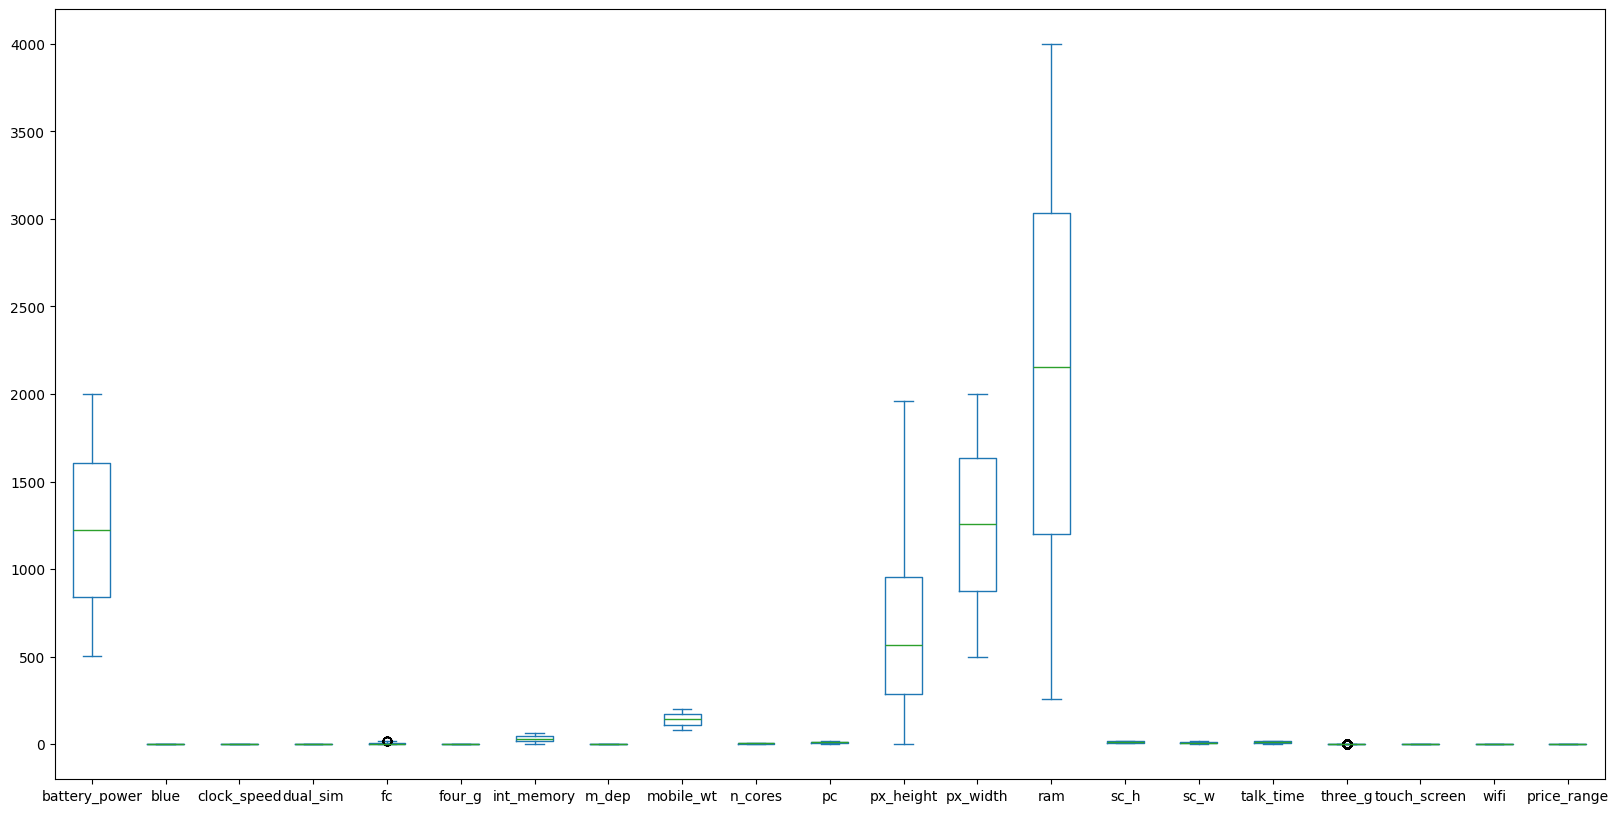

In [17]:
#vidualtion categorical and numerical data
df.plot(kind='box',figsize=(20,10))

In [18]:
# vidualtion categorical and numerical columns.
categorical_variables=[col for col in df.columns if df[col].nunique()<=8]
print('categorical:',categorical_variables)
continuous_variables=[col for col in df.columns if df[col].nunique()>8]
print('continuous:' ,continuous_variables)

categorical: ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']
continuous: ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


#### Il y a 8 colonnes catégorielles et 13 colonnes continues.

### 4-1. checking categorical data

In [19]:
# check for cardinality in categorical variables
cate_cols=['blue', 'dual_sim','four_g','n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']
for var in cate_cols:
    
    print(var,':', ' contains ', len(df[var].unique()), ' labels')

blue :  contains  2  labels
dual_sim :  contains  2  labels
four_g :  contains  2  labels
n_cores :  contains  8  labels
three_g :  contains  2  labels
touch_screen :  contains  2  labels
wifi :  contains  2  labels
price_range :  contains  4  labels


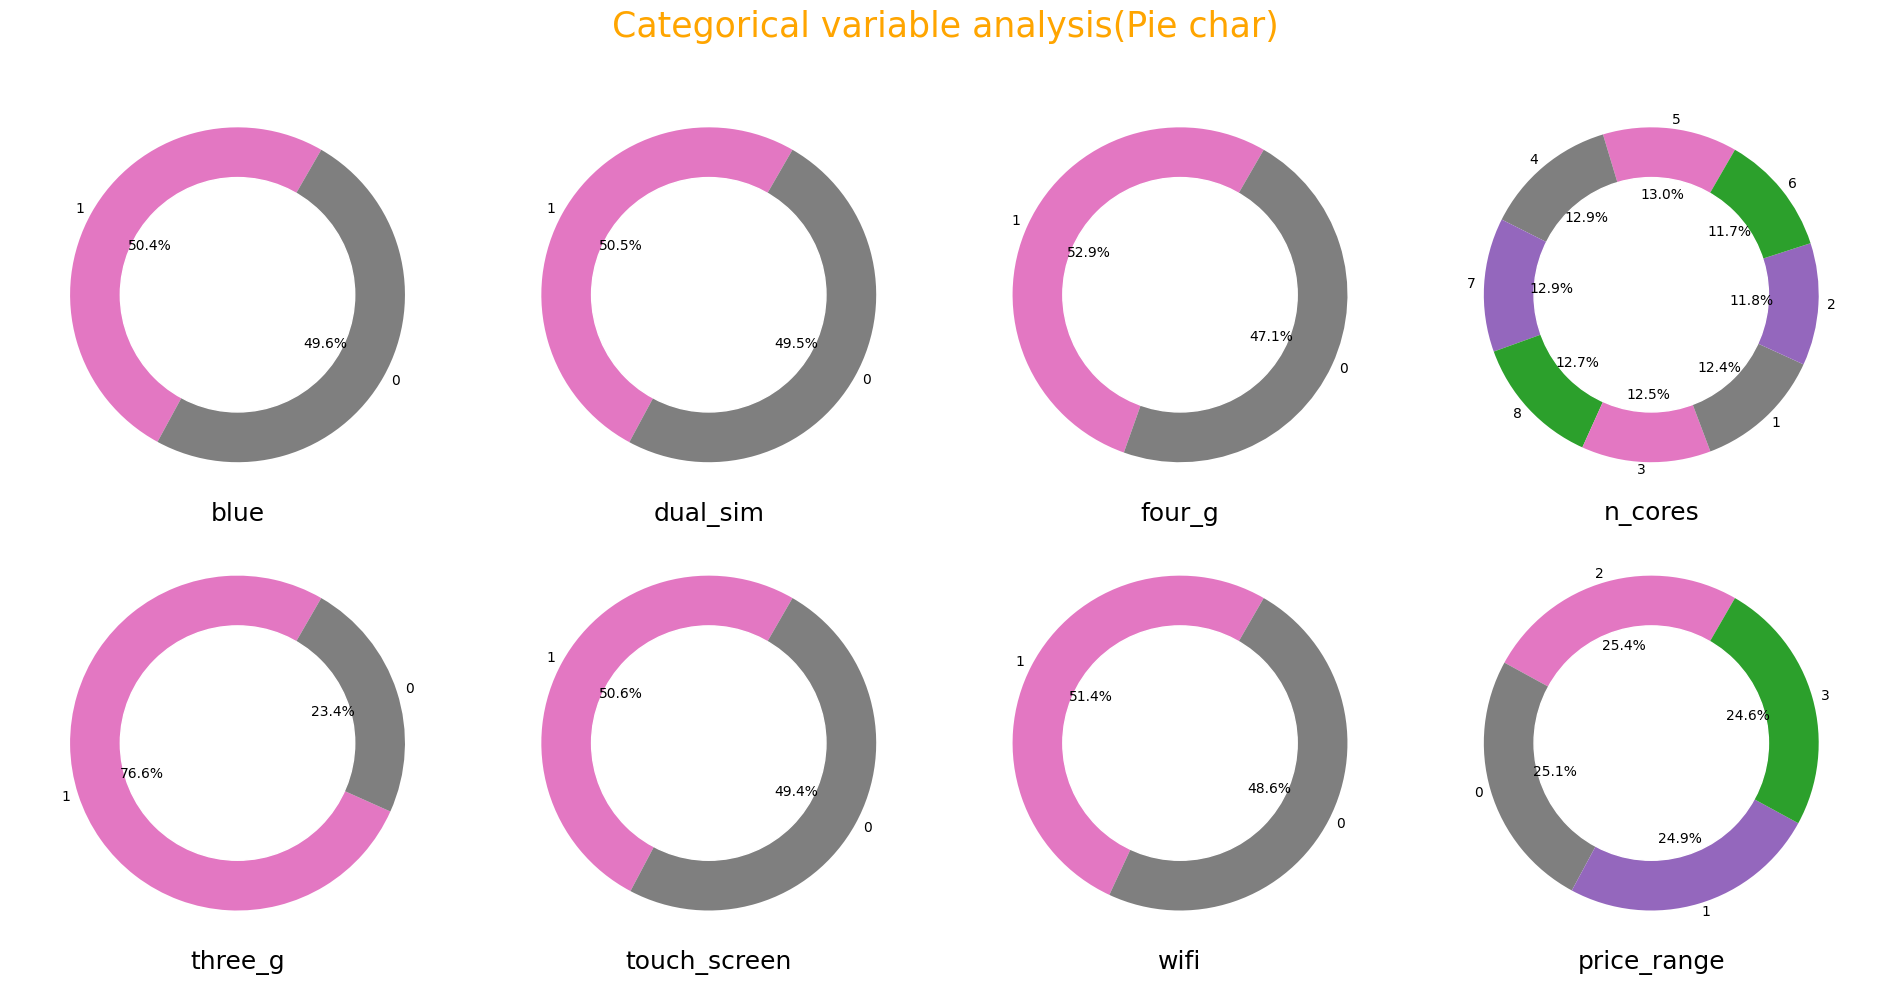

In [20]:
# another way to show pieplot
plt.figure(figsize = [19,10])
plt.suptitle('Categorical variable analysis(Pie char)\n', fontsize=25, c = 'orange')
colors = ['C6','C7', 'C4', 'C2']
i = 1
for col in cate_cols:
        plt.subplot(2,4,i)
        my_circle = plt.Circle((0, 0), 0.7, color='white')
        sizes = df[col].value_counts()
        d = plt.pie(sizes, colors = colors, labels = df[col].value_counts().index, autopct='%1.1f%%',
            startangle=60, labeldistance=1.05)
        plt.axis('equal')
        plt.gca().add_artist(my_circle)
            
        plt.xlabel(col, size=18)
        
        i+=1 
            
plt.tight_layout()
plt.show()

Observation :
- Le nombre de téléphones mobiles avec 3G est presque 3 fois celui des téléphones mobiles sans 3G.
- Le nombre de téléphones mobiles avec 4 cœurs est supérieur à celui des autres, et le nombre de téléphones mobiles avec moins de cœurs est presque égal.
- Le nombre de téléphones mobiles avec 4G est presque égal à celui des autres sans 4G.
- Le nombre de téléphones mobiles avec deux cartes SIM est presque égal au nombre de téléphones mobiles sans.
- Le nombre de téléphones mobiles avec Bluetooth est presque égal à celui des téléphones mobiles sans Bluetooth.
- Le nombre de téléphones mobiles avec écran tactile est presque égal au nombre de téléphones mobiles sans écran tactile.
- Le nombre de téléphones mobiles avec Wifi est presque égal au nombre de téléphones mobiles sans Wifi.
- Nous avons le même nombre de téléphones pour chaque gamme de prix, ce qui est un bon point pour apprendre et entraîner un jeu de données.

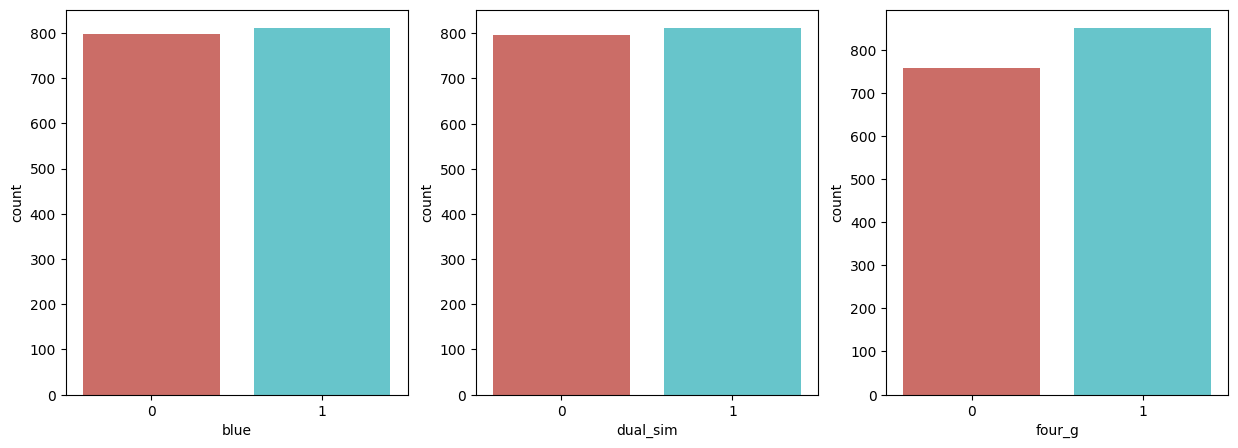

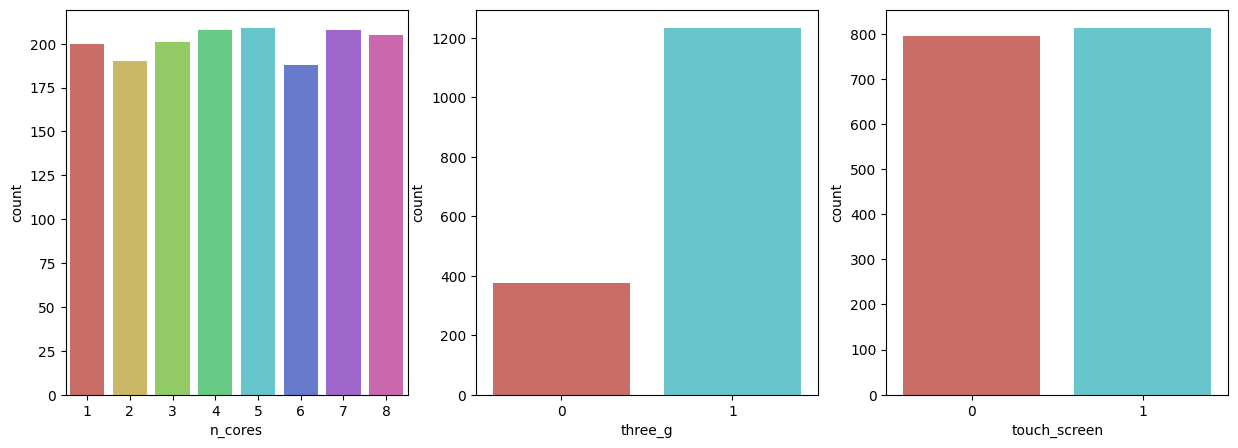

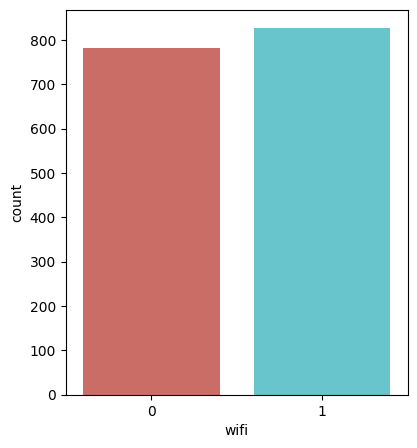

In [21]:
# checking categorical data count with countplot
cate_cols=['blue', 'dual_sim','four_g','n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']
i=0
while i <9:
    fig=plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.countplot(x=cate_cols[i], data=df, palette = 'hls')
    i+=1
    if i==7:
        break
    plt.subplot(1,3,2)
    sns.countplot(x=cate_cols[i], data=df, palette = 'hls')
    i+=1
    plt.subplot(1,3,3)
    sns.countplot(x=cate_cols[i], data=df, palette = 'hls')
    i+=1
   
    plt.show()

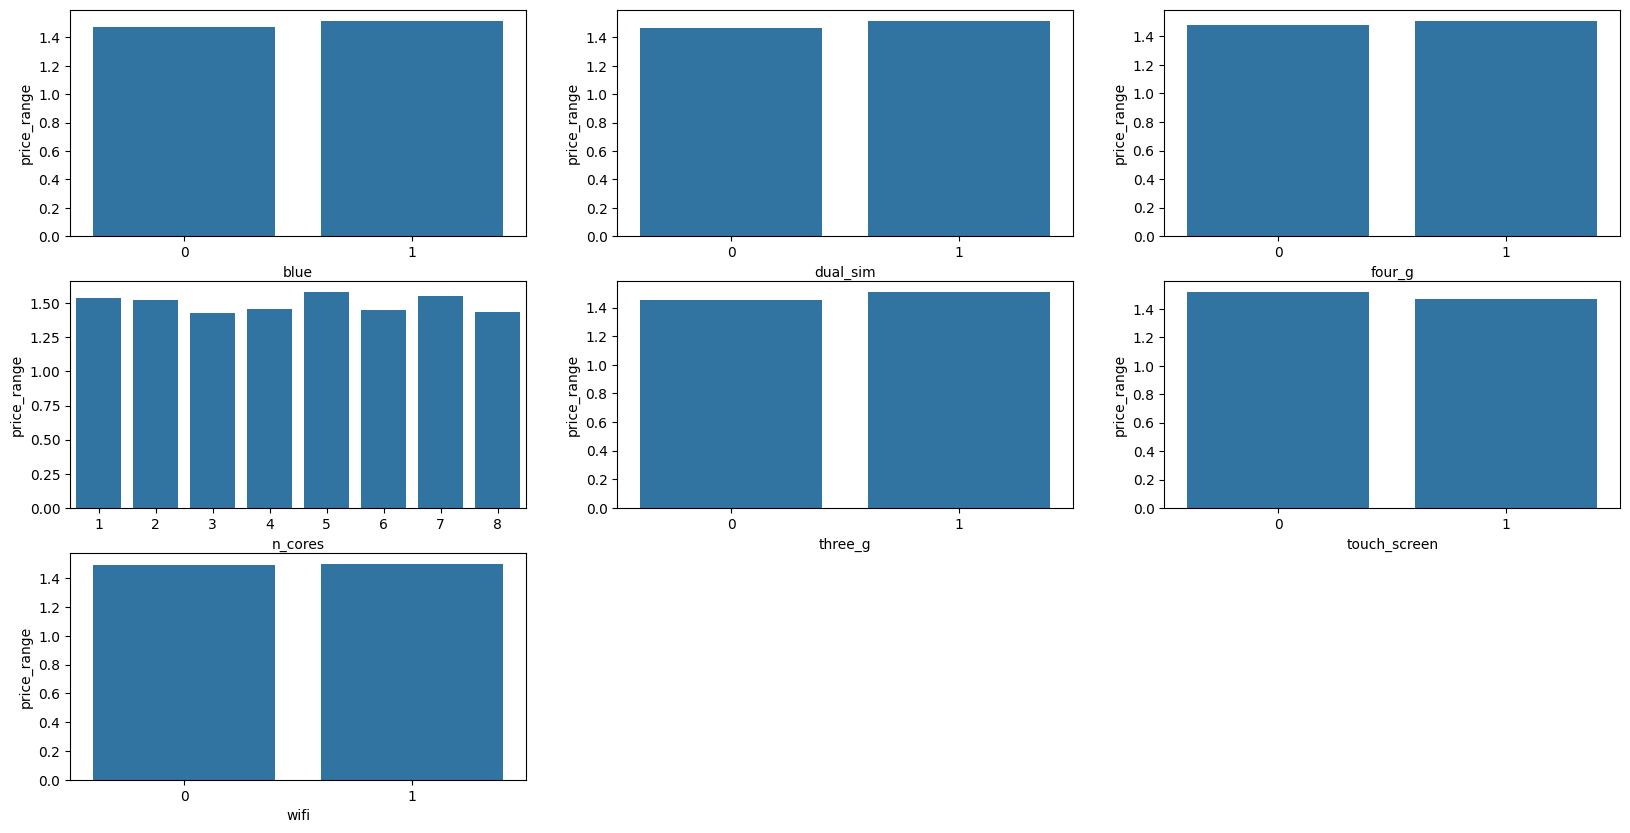

In [22]:
#categorical feature and target
cate_cols=['blue', 'dual_sim','four_g','n_cores', 'three_g', 'touch_screen', 'wifi']
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(cate_cols):
    ax=fig.add_subplot(3,3,i+1)
    sns.barplot(x=col,y='price_range',data=df,ci=None)
   

Observation :
- Comme on peut le voir, à l'exception de "three_g", les distributions dans toutes les autres caractéristiques sont équilibrées, tout comme les classes de la cible.
- Notez que 6 caractéristiques sont de type booléen. Ces caractéristiques sont "blue", "dual_sim", "four_g", "three_g", "touch_screen", et "wifi". De plus, les valeurs de la caractéristique "n_cores" sont discrètes.

<Figure size 700x900 with 0 Axes>

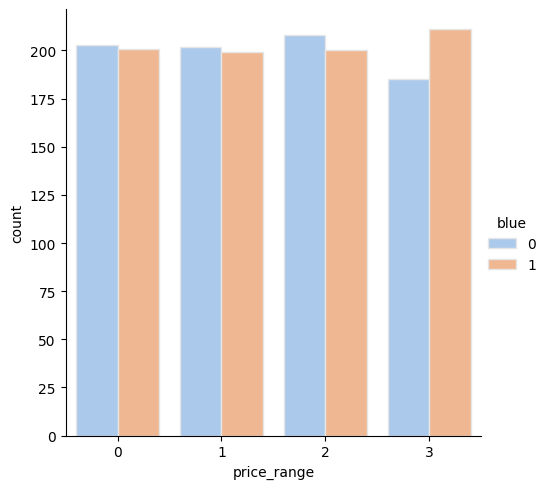

<Figure size 700x900 with 0 Axes>

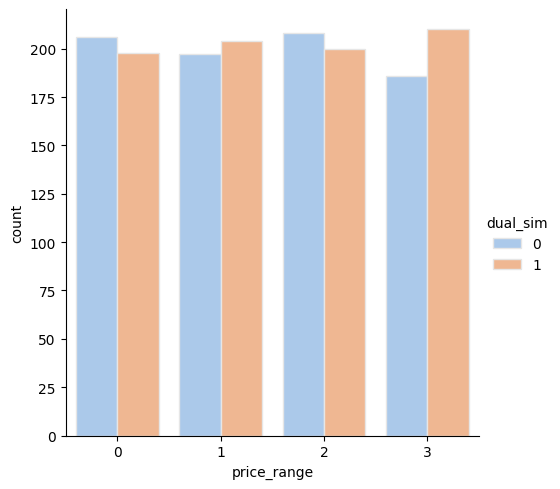

<Figure size 700x900 with 0 Axes>

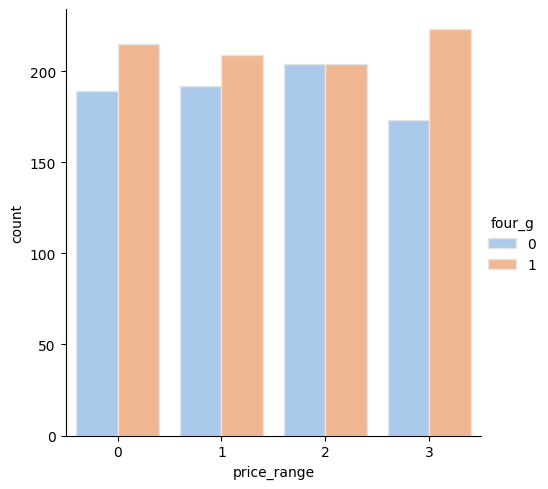

<Figure size 700x900 with 0 Axes>

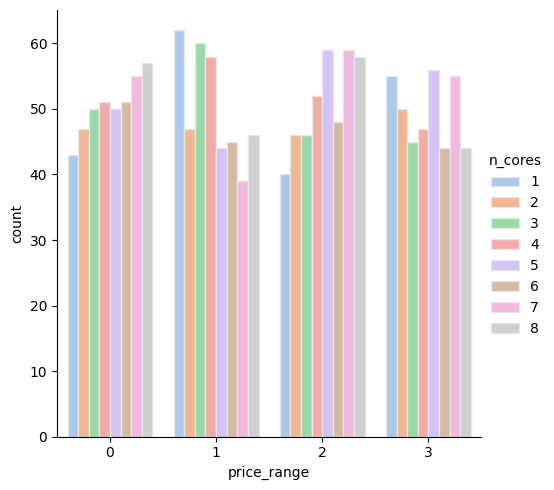

<Figure size 700x900 with 0 Axes>

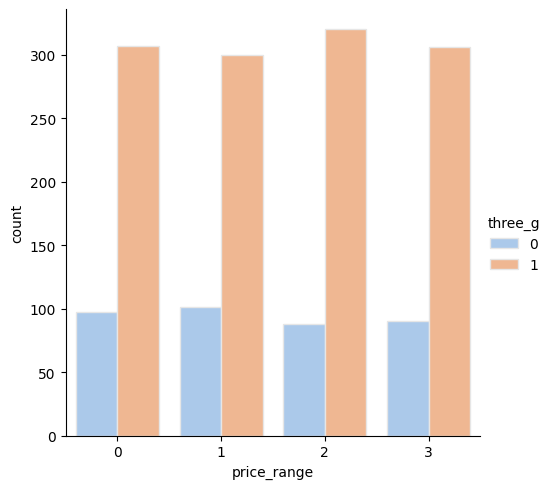

<Figure size 700x900 with 0 Axes>

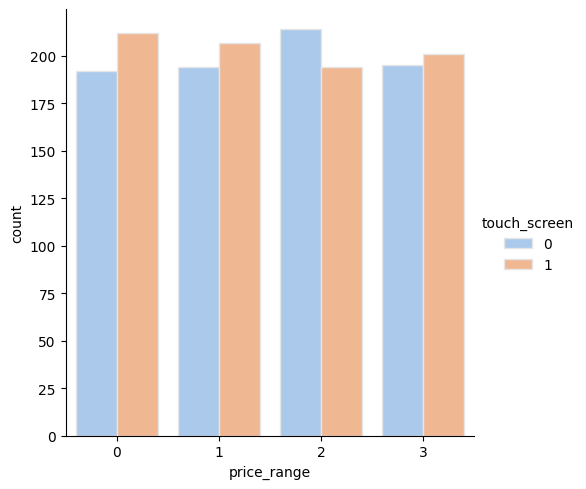

<Figure size 700x900 with 0 Axes>

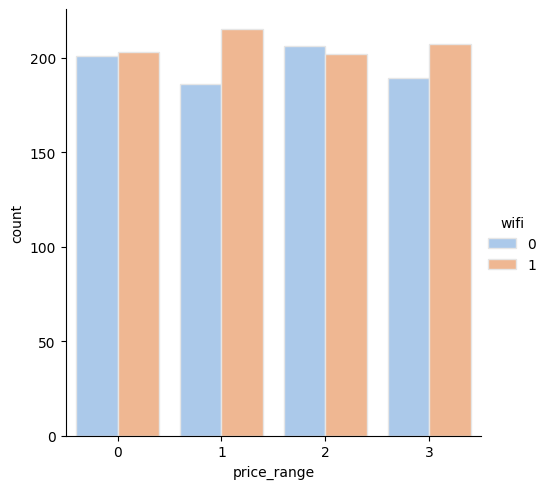

In [23]:
# checking categorical data count and price range with countplot
for i in range(0,7) :
    plt.figure(figsize=(7,9))
    sns.catplot(x="price_range", hue=cate_cols[i], kind="count",palette="pastel", edgecolor=".9",data=df)
    plt.show()

Observation :
- Les téléphones mobiles chers ont Bluetooth.
- Si un téléphone mobile dispose d'un support pour carte SIM double, alors le prix augmentera.
- Les téléphones très chers offrent la fonctionnalité 4G.
- Les téléphones très chers offrent la fonctionnalité 3G.

### 4-2. Checking numerical data

Text(0, 0.5, 'price_range')

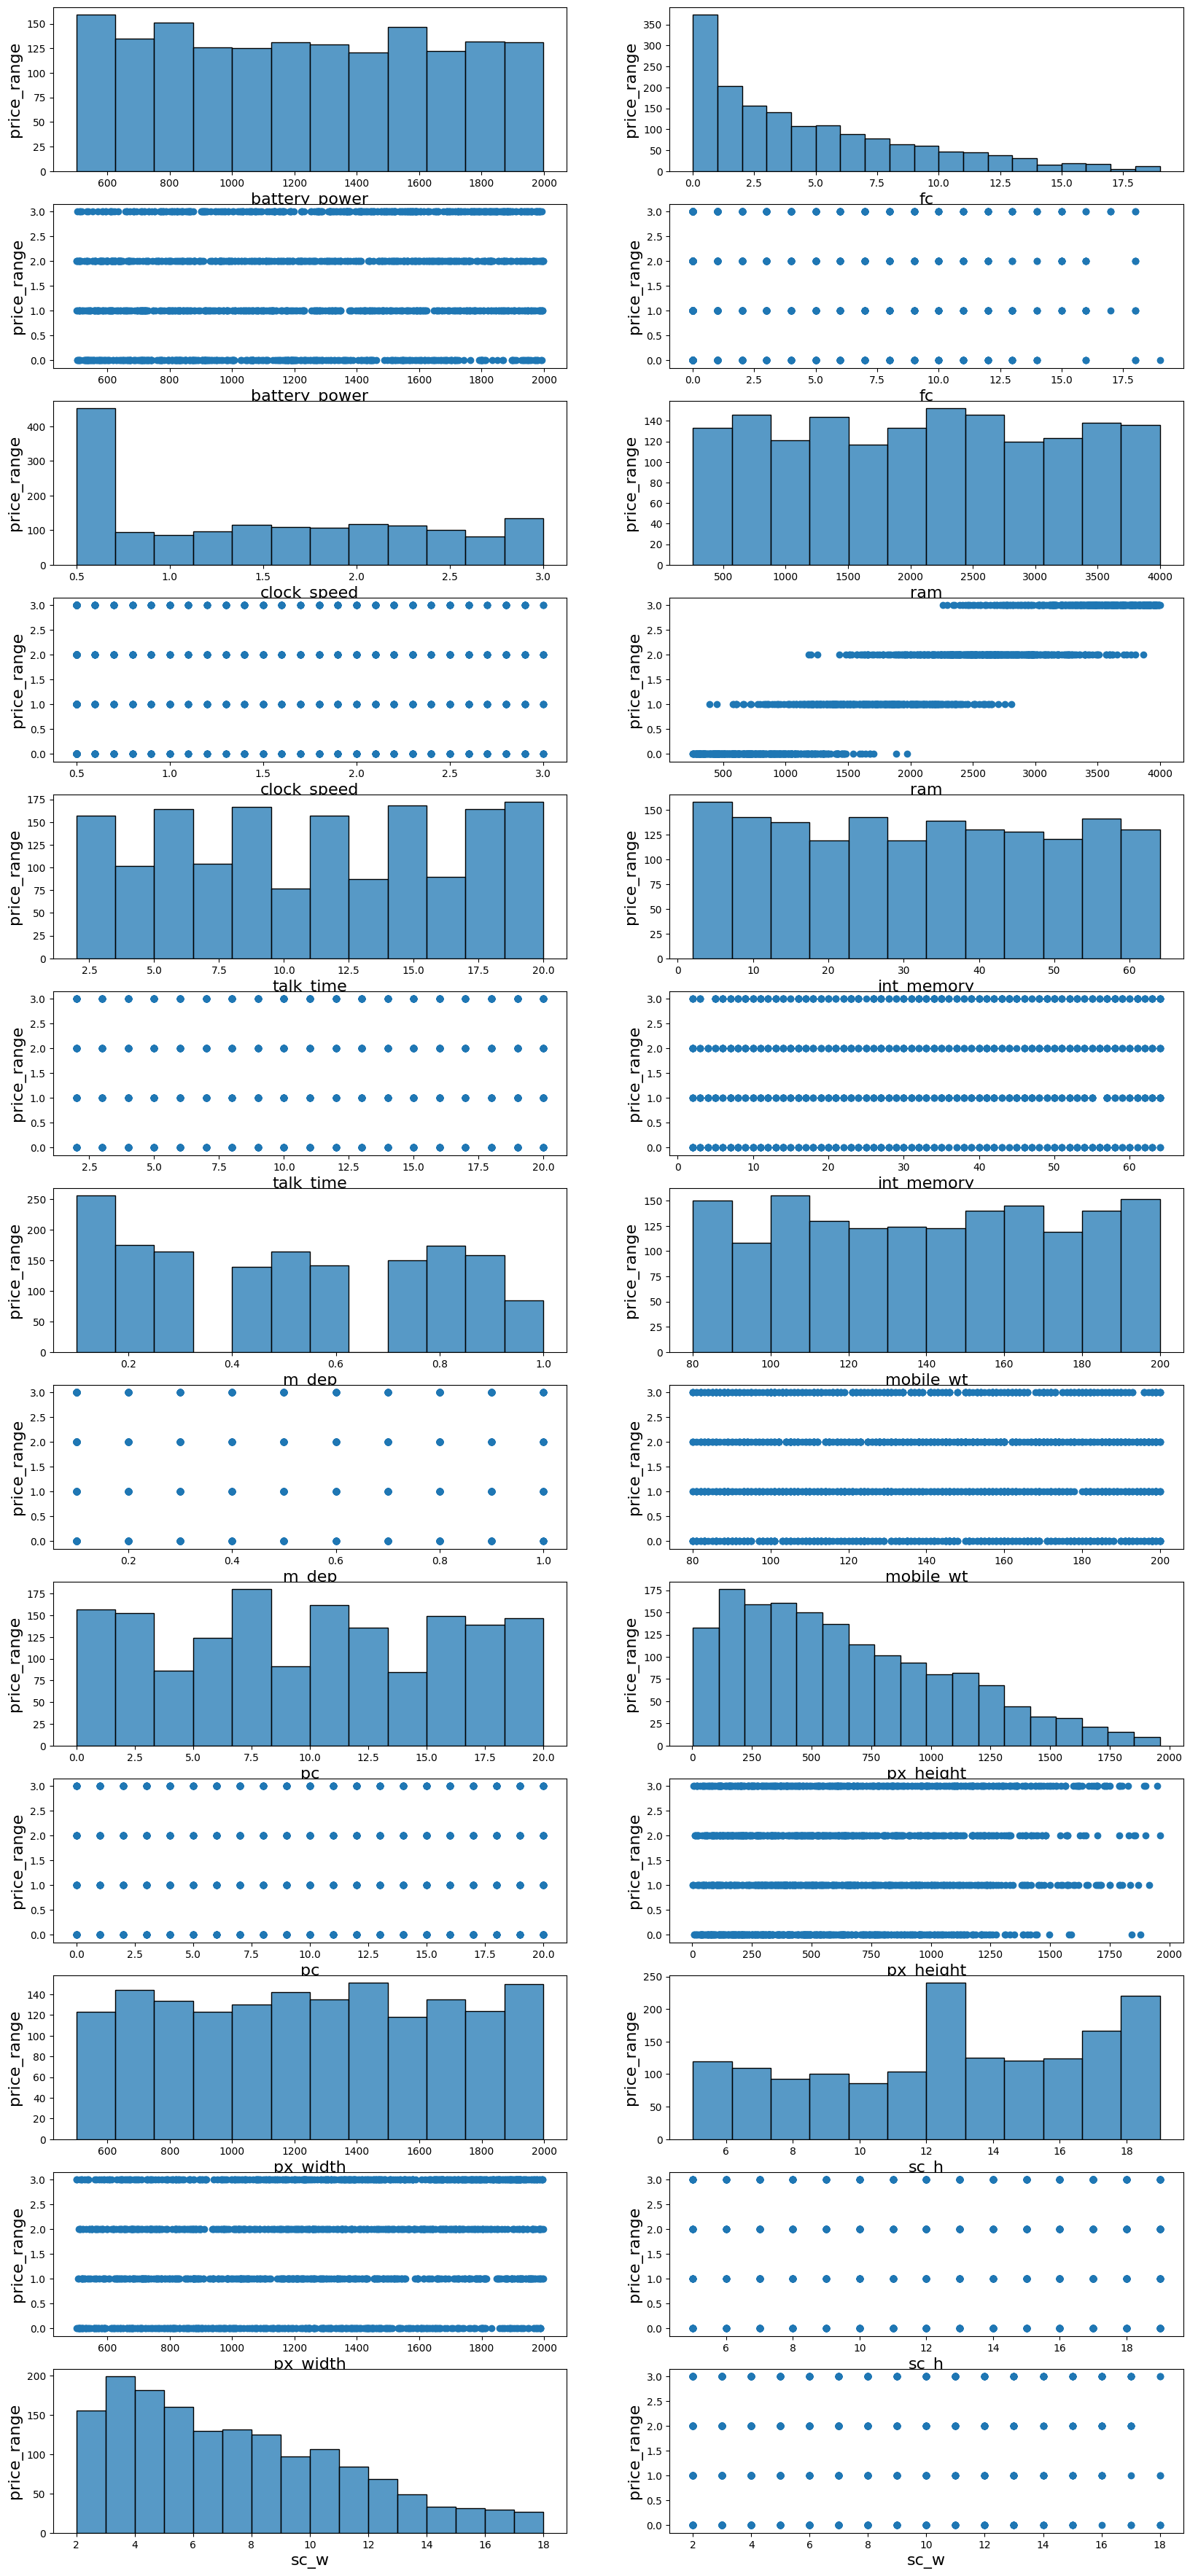

In [24]:
#Checking for noise with scatter plot
#Colsnum = ['battery_power','fc','clock_speed','ram','talk_time','int_memory','m_dep',
       #'mobile_wt','pc','px_height','px_width','sc_h','sc_w']
plt.figure(figsize=(20,45))

plt.subplot(13,2,1)
sns.histplot(df.battery_power)
plt.xlabel( 'battery_power', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,2)
sns.histplot(df.fc)
plt.xlabel( 'fc', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)



plt.subplot(13,2,3)
plt.scatter(df.battery_power, df['price_range'])
plt.xlabel( 'battery_power', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,4)
plt.scatter(df.fc, df['price_range'])
plt.xlabel( 'fc', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,5)
sns.histplot(df.clock_speed)
plt.xlabel( 'clock_speed', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,6)
sns.histplot(df.ram)
plt.xlabel( 'ram', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)


plt.subplot(13,2,7)
plt.scatter(df.clock_speed, df['price_range'])
plt.xlabel( 'clock_speed', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,8)
plt.scatter(df.ram, df['price_range'])
plt.xlabel( 'ram', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,9)
sns.histplot(df.talk_time)
plt.xlabel( 'talk_time', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,10)
sns.histplot(df['int_memory'])
plt.xlabel( 'int_memory', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,11)
plt.scatter(df.talk_time, df['price_range'])
plt.xlabel( 'talk_time', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)


plt.subplot(13,2,12)
plt.scatter(df['int_memory'], df['price_range'])
plt.xlabel( 'int_memory', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,13)
sns.histplot(df.m_dep)
plt.xlabel( 'm_dep', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,14)
sns.histplot(df['mobile_wt'])
plt.xlabel( 'mobile_wt', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,15)
plt.scatter(df.m_dep, df['price_range'])
plt.xlabel( 'm_dep', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)


plt.subplot(13,2,16)
plt.scatter(df['mobile_wt'], df['price_range'])
plt.xlabel( 'mobile_wt', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)


plt.subplot(13,2,17)
sns.histplot(df.pc)
plt.xlabel( 'pc', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,18)
sns.histplot(df['px_height'])
plt.xlabel( 'px_height', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,19)
plt.scatter(df.pc, df['price_range'])
plt.xlabel( 'pc', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)


plt.subplot(13,2,20)
plt.scatter(df['px_height'], df['price_range'])
plt.xlabel( 'px_height', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,21)
sns.histplot(df.px_width)
plt.xlabel( 'px_width', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,22)
sns.histplot(df['sc_h'])
plt.xlabel( 'sc_h', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,23)
plt.scatter(df.px_width, df['price_range'])
plt.xlabel( 'px_width', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)


plt.subplot(13,2,24)
plt.scatter(df['sc_h'], df['price_range'])
plt.xlabel( 'sc_h', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,25)
sns.histplot(df['sc_w'])
plt.xlabel( 'sc_w', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

plt.subplot(13,2,26)
plt.scatter(df.sc_w, df['price_range'])
plt.xlabel( 'sc_w', fontsize=16)
plt.ylabel( 'price_range', fontsize=16)

Observation :
- Le dataset ne contient pas de bruit.
- La taille de la RAM augmente avec le prix du téléphone, et il existe une relation entre la RAM et la gamme de prix.
- Dans la classe 0 (bas de gamme), les valeurs de la RAM varient entre 0 et 2000 mégaoctets.
- Dans la classe 1 (moyenne gamme), les valeurs de la RAM varient entre 0 et 3000 mégaoctets.
- Dans la classe 2 (haut de gamme), les valeurs de la RAM varient entre 1000 et 4000 mégaoctets.
- Dans la classe 3 (très haut de gamme), les valeurs de la RAM varient entre 2000 et 4000 mégaoctets (principalement entre 3500 et 4000 mégaoctets).

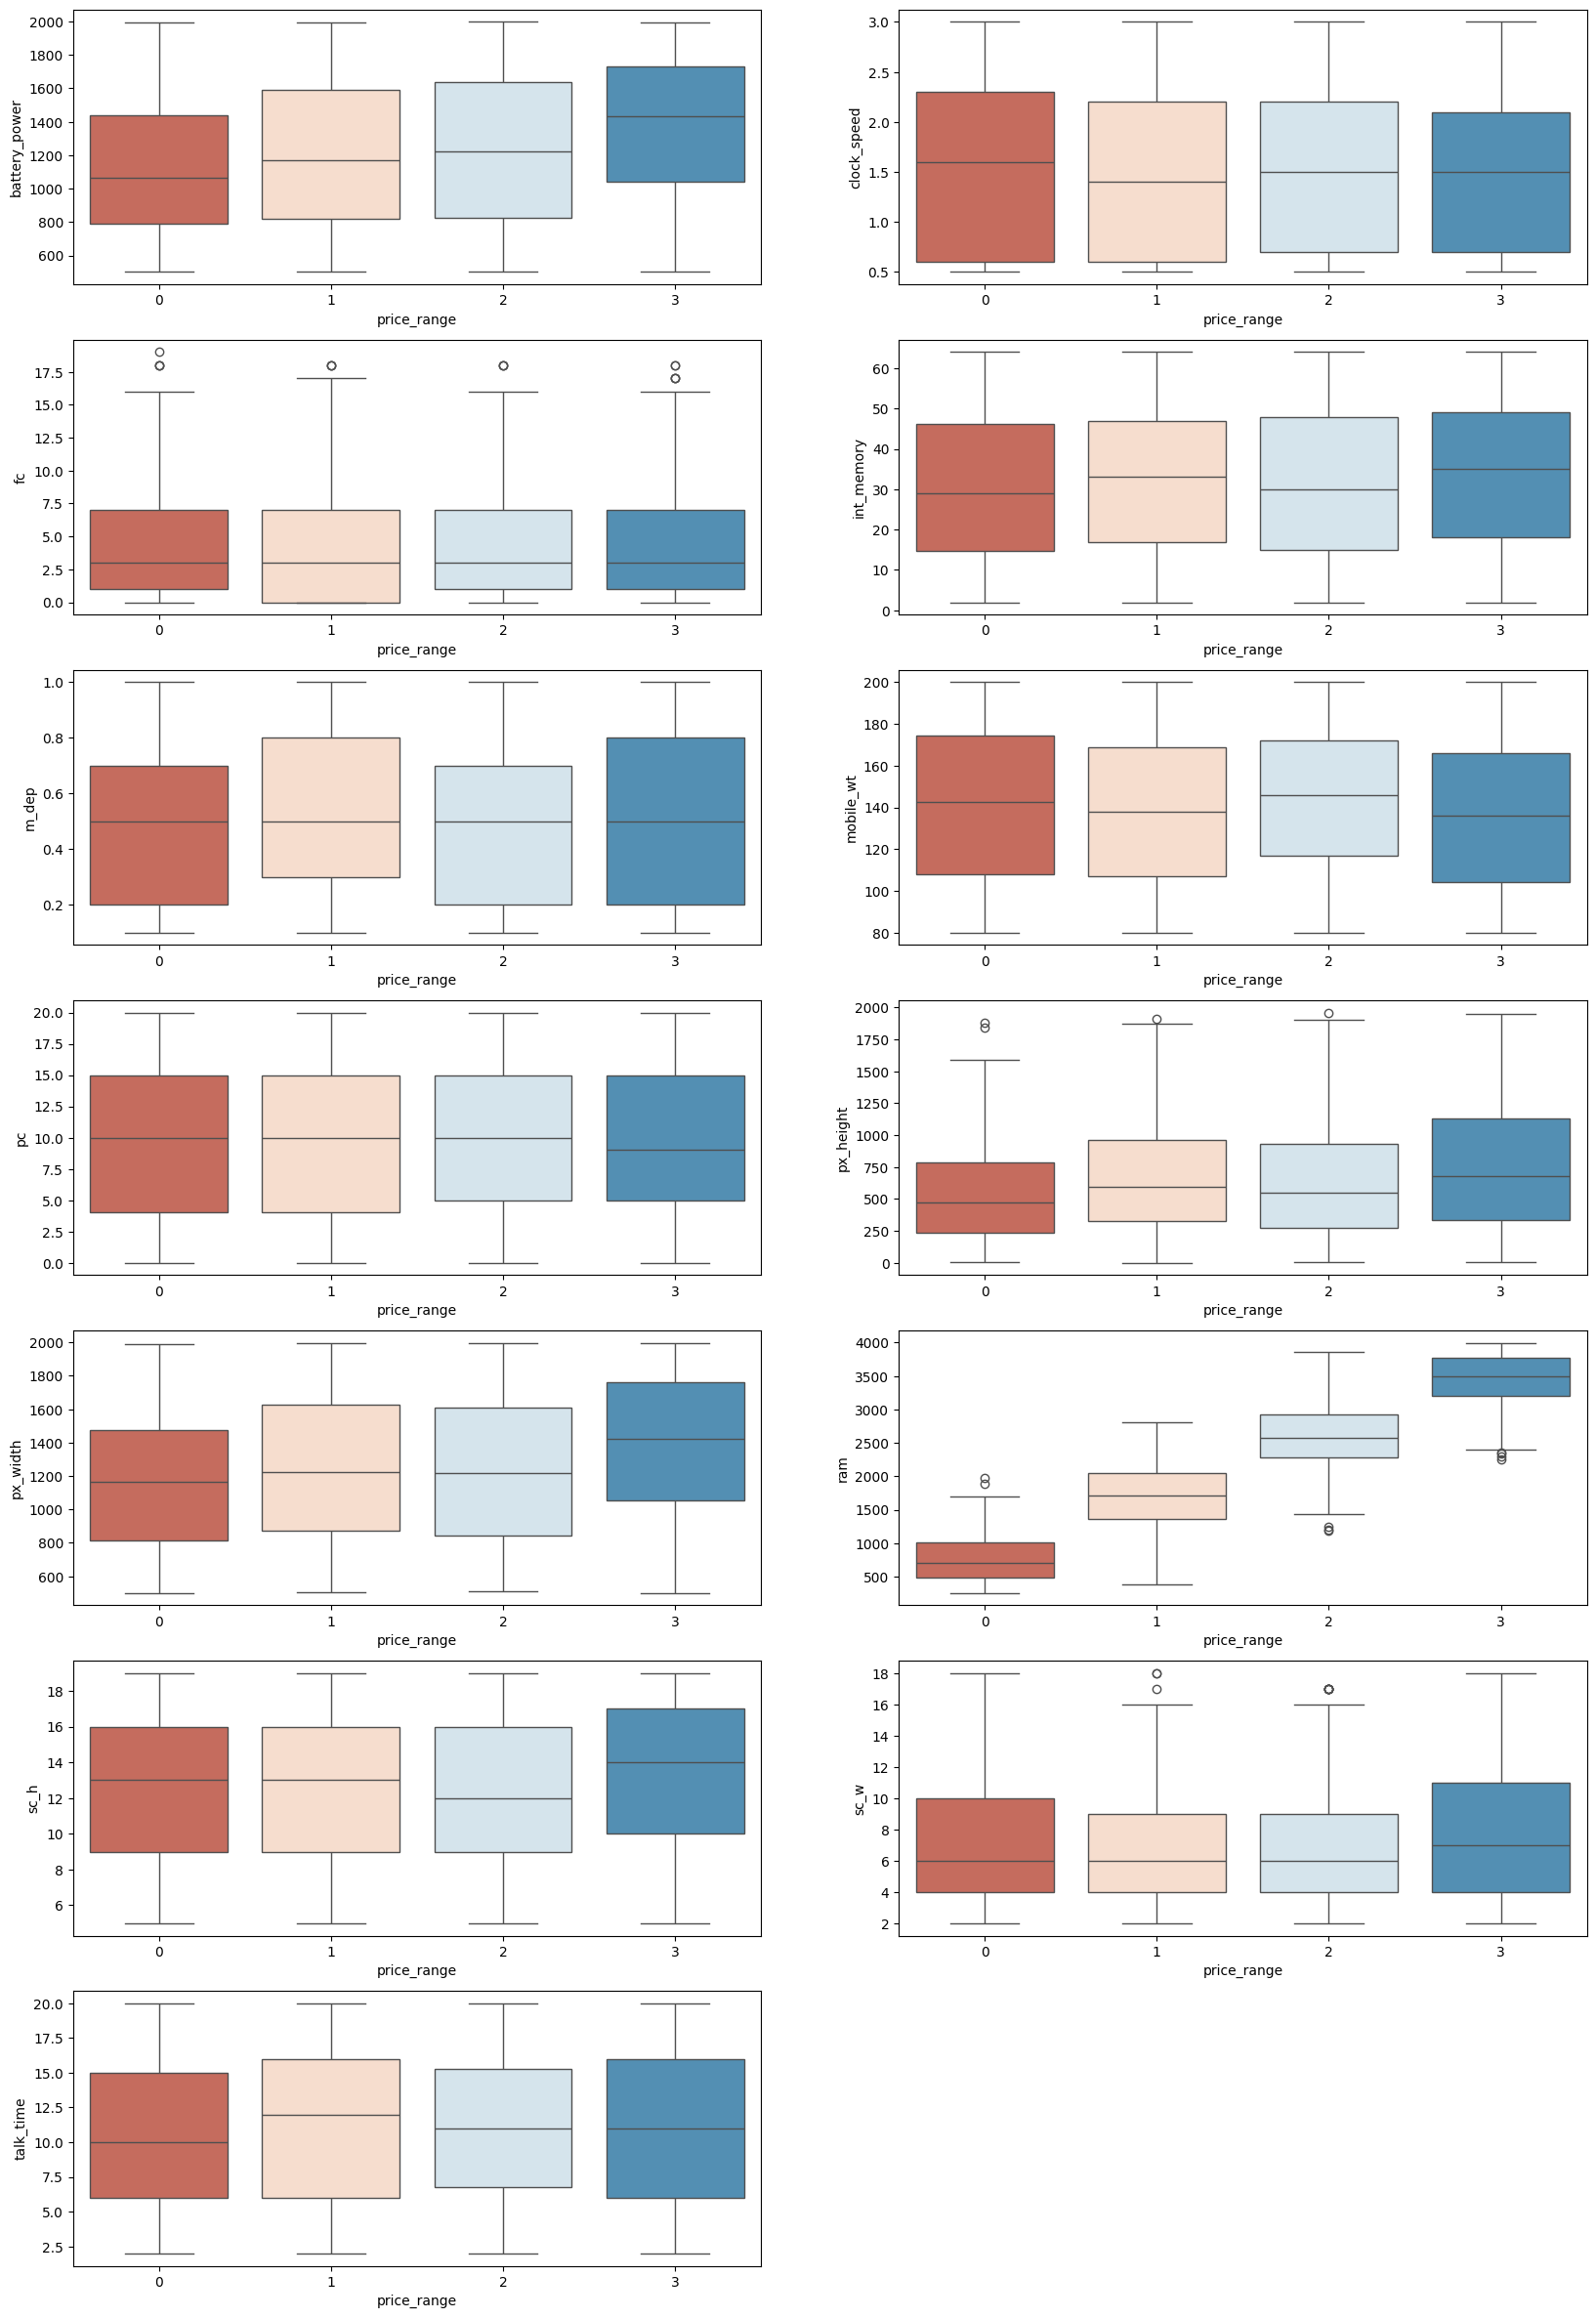

In [25]:
# checking numerical data count
nume_cols=['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',
           'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

fig=plt.figure(figsize=(20,30))
for i,col in enumerate(nume_cols):
    ax=fig.add_subplot(7,2,i+1)
    sns.boxplot(y=df[col],x=df['price_range'], palette = "RdBu")

Observation :
- Les téléphones très chers ont une mémoire plus grande.
- Les téléphones très chers ont une batterie plus puissante.
- Les téléphones relativement épais ont un prix plus bas, tandis que les téléphones très fins sont beaucoup plus chers.
- Les téléphones à bas prix peuvent être moins lourds car ils n'ont pas autant d'équipements qu'un téléphone cher, comme une grande batterie ou des caméras.
- L'appareil photo principal est l'un des indicateurs ou raisons du prix du téléphone.
- Le temps de conversation maximal se trouve dans les gammes de prix basses à moyennes.

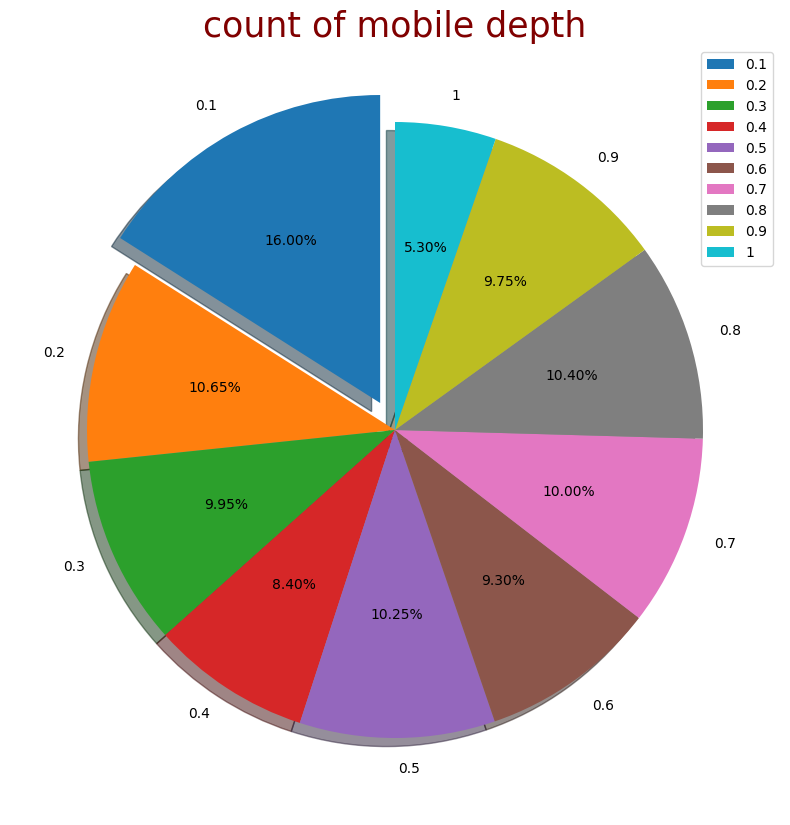

In [26]:
m_dep_label = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1 ]
m_dep_size = [320,213,199,168,205,186,200,208,195,106]
m_dep_explode = (0.1,0,0,0,0,0,0,0,0,0)

plt.figure(figsize=(13,10))
plt.pie( m_dep_size , explode=m_dep_explode , labels=m_dep_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90 )
plt.title("count of mobile depth",fontsize=25,color='maroon')
plt.legend()

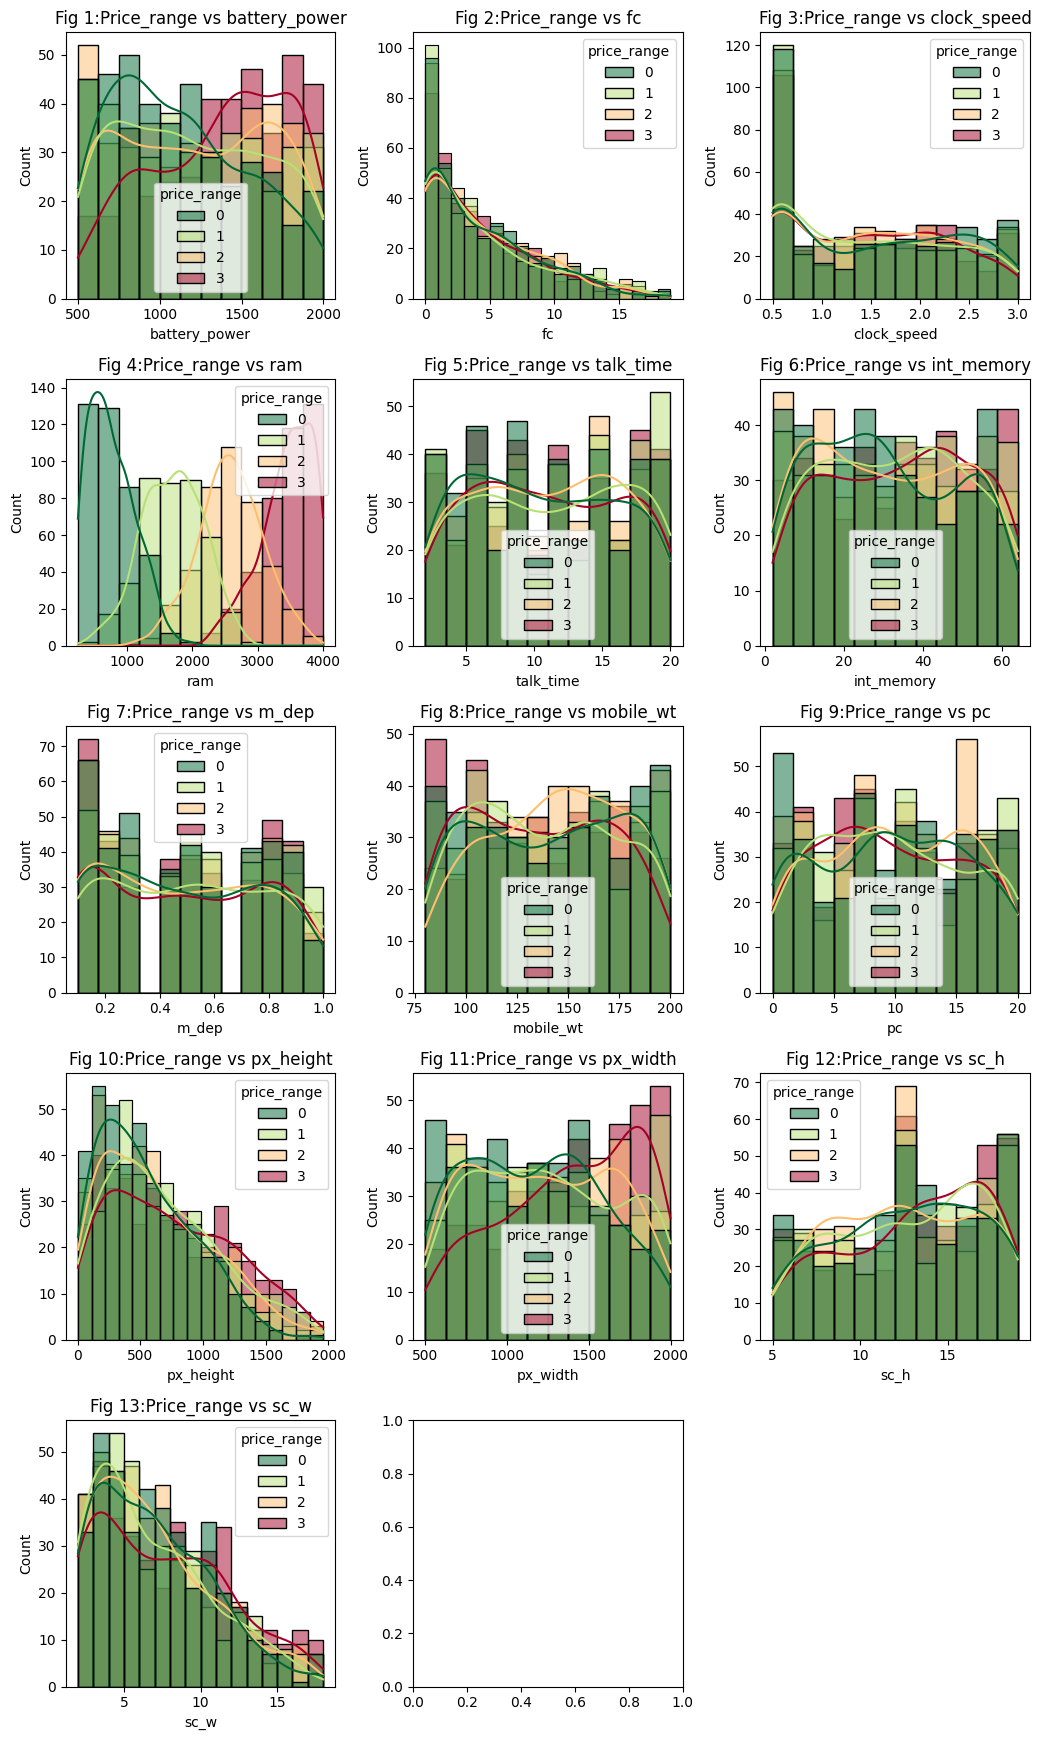

In [33]:
#vis for numerical type
nume_cols = ['battery_power','fc','clock_speed','ram','talk_time','int_memory','m_dep',
       'mobile_wt','pc','px_height','px_width','sc_h','sc_w']
n_rows=5
n_cols=3
fig,ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5,n_rows*3.5))

for r in range (0,n_rows):
    for c in range(0,n_cols):
        idx = r*n_cols + c #index loop through list 
        if idx <len(nume_cols):
            ax_idx = ax[r,c]
            sns.histplot(data=df, x=nume_cols[idx],hue ='price_range',kde='true'
                         ,palette='RdYlGn_r',ax=ax_idx)
            ax_idx.set_title(f"Fig {idx+1}:Price_range vs {nume_cols[idx]}")
ax.flat[-1].set_visible(False) # remove subplot doesn't use 
plt.tight_layout()
plt.show()

Observation :
1. Les téléphones mobiles appartenant au groupe avec une gamme de prix de 0 sont largement distribués du côté de la faible puissance de batterie.
2. Les téléphones mobiles appartenant au groupe avec une gamme de prix de 3 sont largement distribués du côté de la haute puissance de batterie.
3. La puissance de la batterie est relativement uniformément distribuée pour les téléphones mobiles appartenant aux groupes avec les gammes de prix 1 et 2.
4. La taille de la RAM augmente le prix du téléphone mobile.
5. La plupart des valeurs de la vitesse d'horloge sont distribuées entre 0,5 et 0,6.
6. Plus la hauteur des pixels est grande, moins il y a de téléphones mobiles.

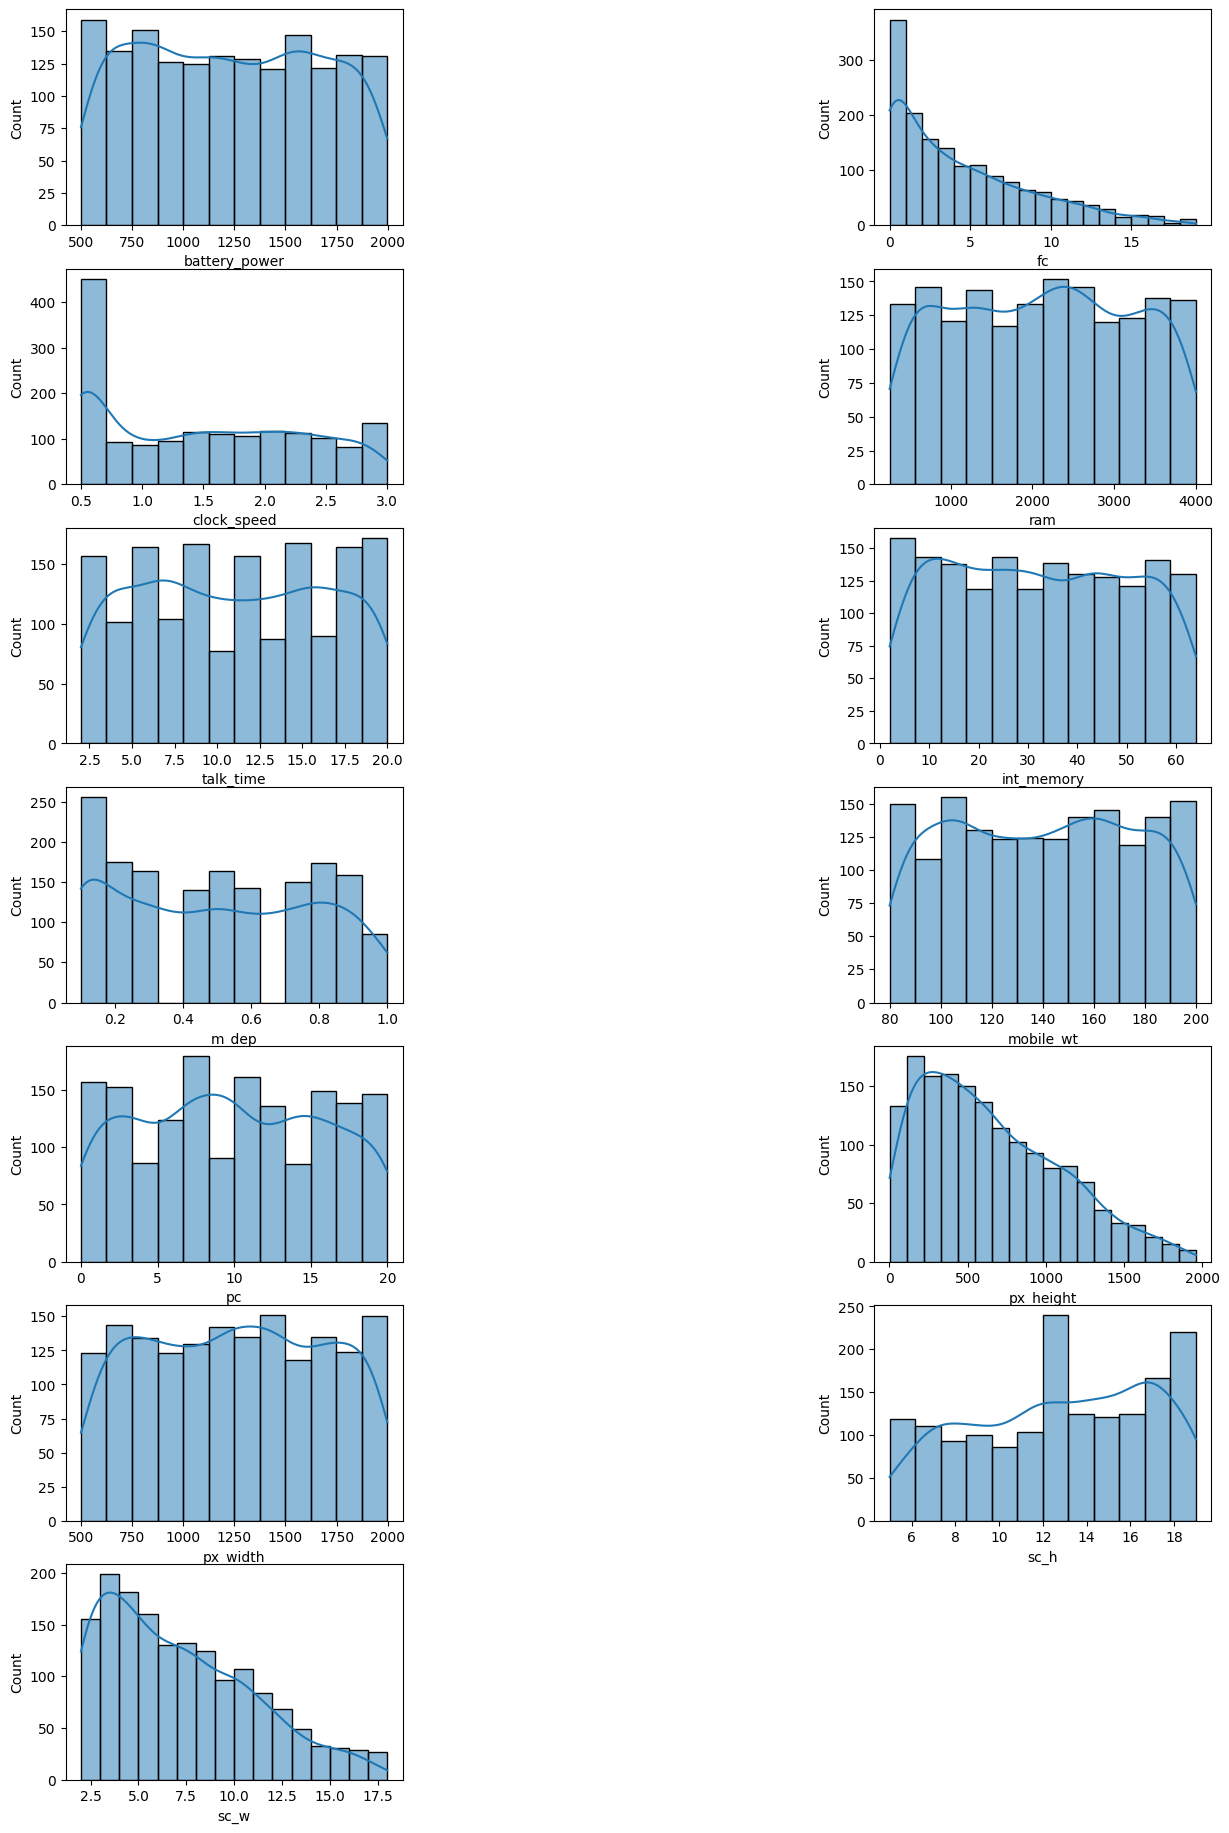

In [34]:
##Checking distributions of numerical data
fig = plt.figure(figsize = (20,60));
for index, feature in enumerate(nume_cols):
    plt.subplot(18, 4, index*2+1);
    sns.histplot(df[feature], kde = True);
plt.show();

In [6]:
#Pour éviter de modifier df directement lorsque l'on travaille avec df_group.
df_group = df.copy()

In [7]:
df_group["battery_group"] = df_group["battery_power"].map(
    lambda i: "low" if 500 < i <= 1000 else
              "medium" if 1000 < i <= 1500 else
              "high"
)

In [8]:
df_group["px_group"] = df_group["px_height"].map(
    lambda i: "under_500" if 0 <= i <= 500 else
              "under_1000" if 500 < i <= 1000 else
              "under_1500" if 1000 < i <= 1500 else
              "over_1500"
)

In [9]:
df_group["memory_group"] = df_group["int_memory"].map(
    lambda i: "low_memory" if 0 < i <= 20 else
              "medium_memory" if 20 < i <= 40 else
              "high_memory"
)

In [10]:
df_group["px_group_2"] = df_group["px_height"].map(
    lambda i: "under_500" if 0 <= i <= 500 else
              "under_1000" if 500 < i <= 1000 else
              "under_1500" if 1000 < i <= 1500 else
              "over_1500"
)

In [11]:
# Créer une fonction de catégorisation de la RAM
def categorize_ram(i):
    if 0 < i <= 1500:
        return "low_ram"
    elif 1500 < i <= 2500:
        return "medium_ram"
    elif 2500 < i:
        return "high_ram"

# Appliquer la fonction avec map
df_group["ram_group"] = df_group["ram"].map(categorize_ram)

In [12]:
# Créer une fonction de catégorisation de la caméra frontale
def categorize_fc(i):
    if 0 <= i <= 5:
        return "under_5"
    elif 5 < i <= 10:
        return "under_10"
    elif 10 < i <= 15:
        return "under_15"
    elif 15 < i:
        return "over_15"

# Appliquer la fonction avec map
df_group["fc_group"] = df_group["fc"].map(categorize_fc)

In [13]:
# Créer une fonction de catégorisation pour la vitesse de l'horloge
def categorize_speed(i):
    if 0 < i <= 1:
        return "less_1"
    elif 1 < i <= 2:
        return "less_2"
    else:
        return "less_3"

# Appliquer la fonction avec map
df_group["speed_group"] = df_group["clock_speed"].map(categorize_speed)

In [15]:
df2=df_group[["battery_group", "px_group", "memory_group", "px_group_2", "ram_group","fc_group","speed_group", 'price_range']]
print(df.head())
df2

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

battery_group    px_group   memory_group  px_group_2   ram_group  \
0              low   under_500     low_memory   under_500    high_ram   
1           medium  under_1000    high_memory  under_1000    high_ram   
2              low  under_1500    high_memory  under_1500    high_ram   
3              low  under_1500     low_memory  under_1500    high_ram   
4             high  under_1500    high_memory  under_1500     low_ram   
...            ...         ...            ...         ...         ...   
1604           low  under_1000    high_memory  under_1000    high_ram   
1605           low  under_1500     low_memory  under_1500     low_ram   
1606          high  under_1000  medium_memory  under_1000  medium_ram   
1607          high   under_500    high_memory   under_500     low_ram   
1608           low   under_500    high_memory   under_500    high_ram   

      fc_group speed_group  price_range  
0      under_5      less_3            1  
1      under_5      less_1            2  
2      under_5      less_1            2  
3      under_5      less_3            2  
4     under_15      less_2            1  
...        ...         ...          ...  
1604   under_5      less_3            3  
1605   under_5      less_1            0  
1606   under_5      less_3            2  
1607   under_5      less_1            0  
1608   under_5      less_2            3  

[1609 rows x 8 columns]

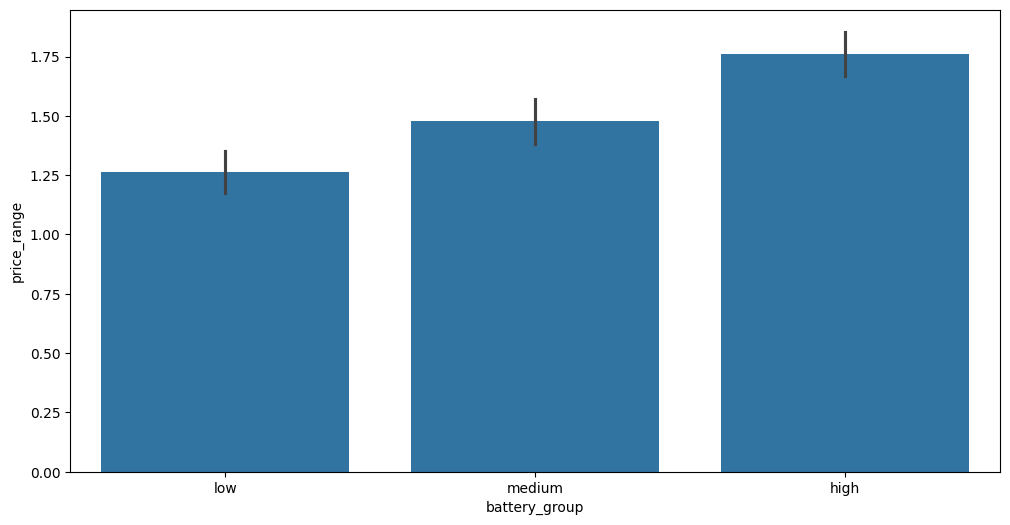

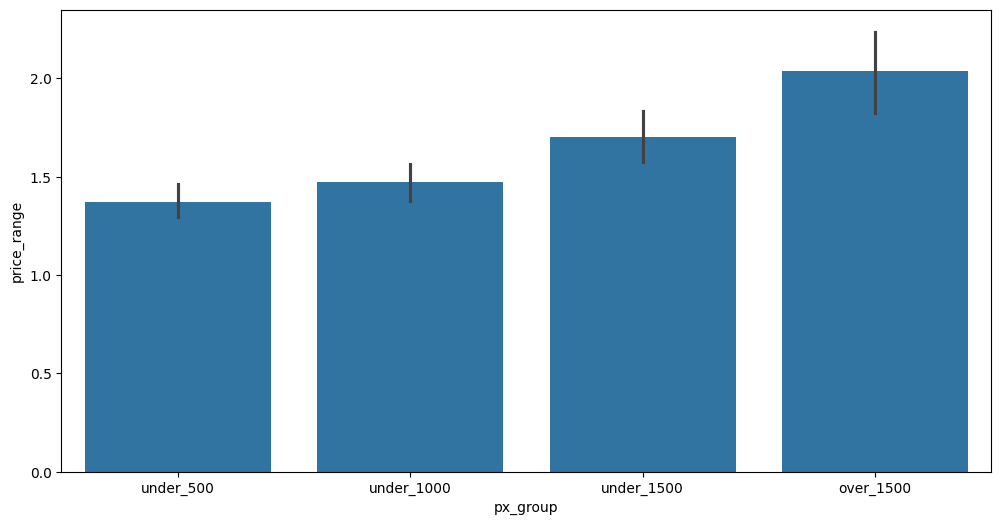

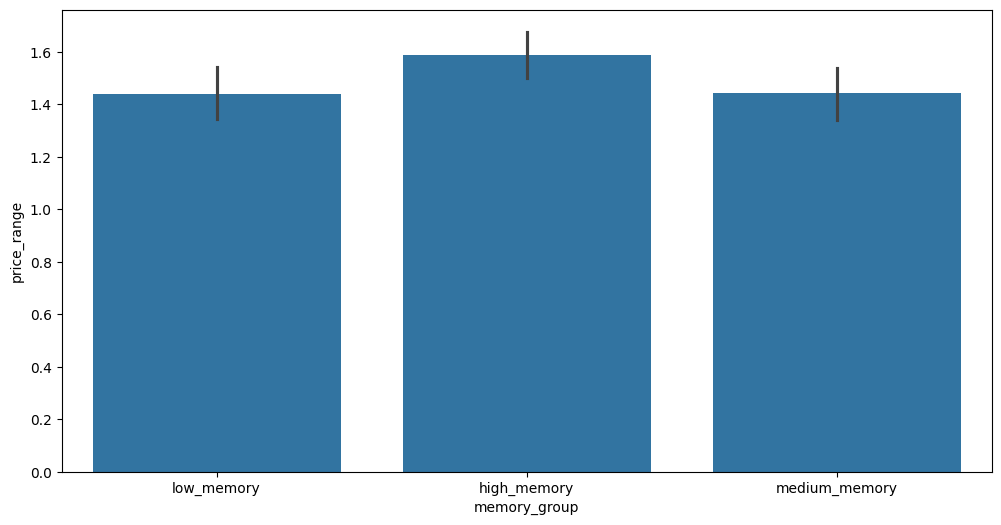

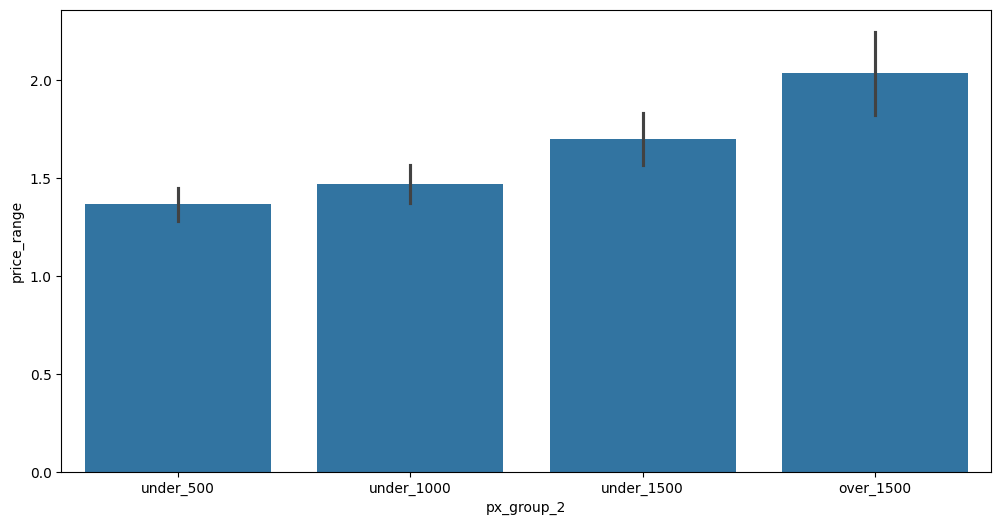

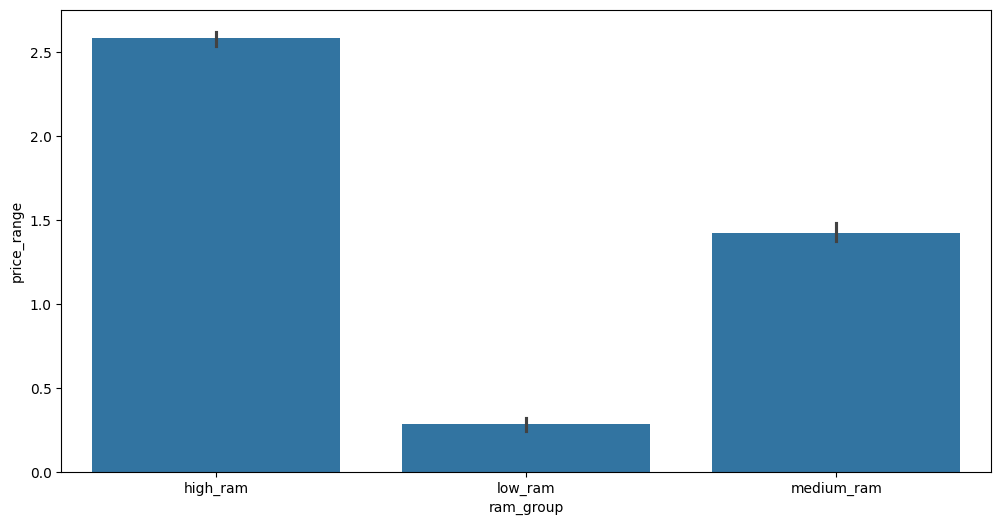

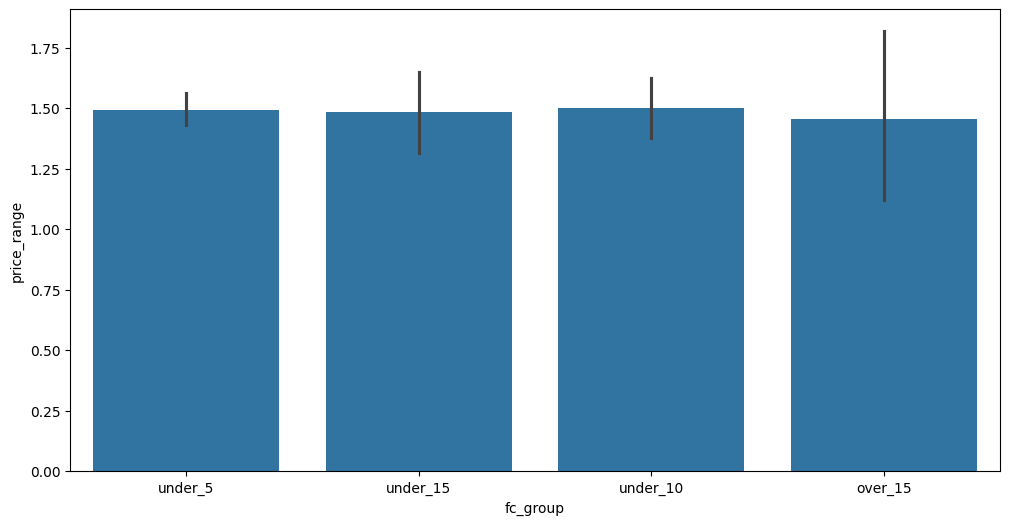

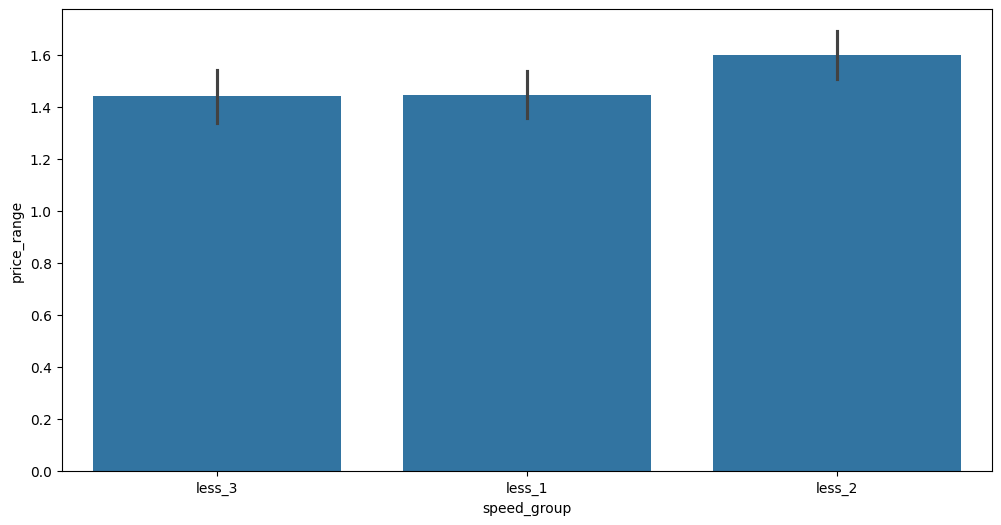

In [18]:
for i in range(7):
    fig = plt.figure(figsize = (12,6))
    sns.barplot(y = 'price_range', x = df2.columns[i], data = df2)

Observation :
1. Lorsque la puissance de la batterie est divisée en groupes, contrairement au nombre, plus la puissance est élevée, plus le prix est élevé.
2. Les téléphones les plus chers sont ceux dont la valeur de la résolution des pixels est supérieure à 1500.
3. Les téléphones les plus chers sont ceux avec une plus grande mémoire.
4. Les téléphones les plus chers sont ceux avec plus de RAM.
5. Il y a peu de différence de prix entre les téléphones mobiles en fonction de la qualité de la caméra frontale.
6. Les téléphones mobiles dont la vitesse d'horloge est inférieure à 2 sont les plus chers.


#### RAM- PRICE RANGE

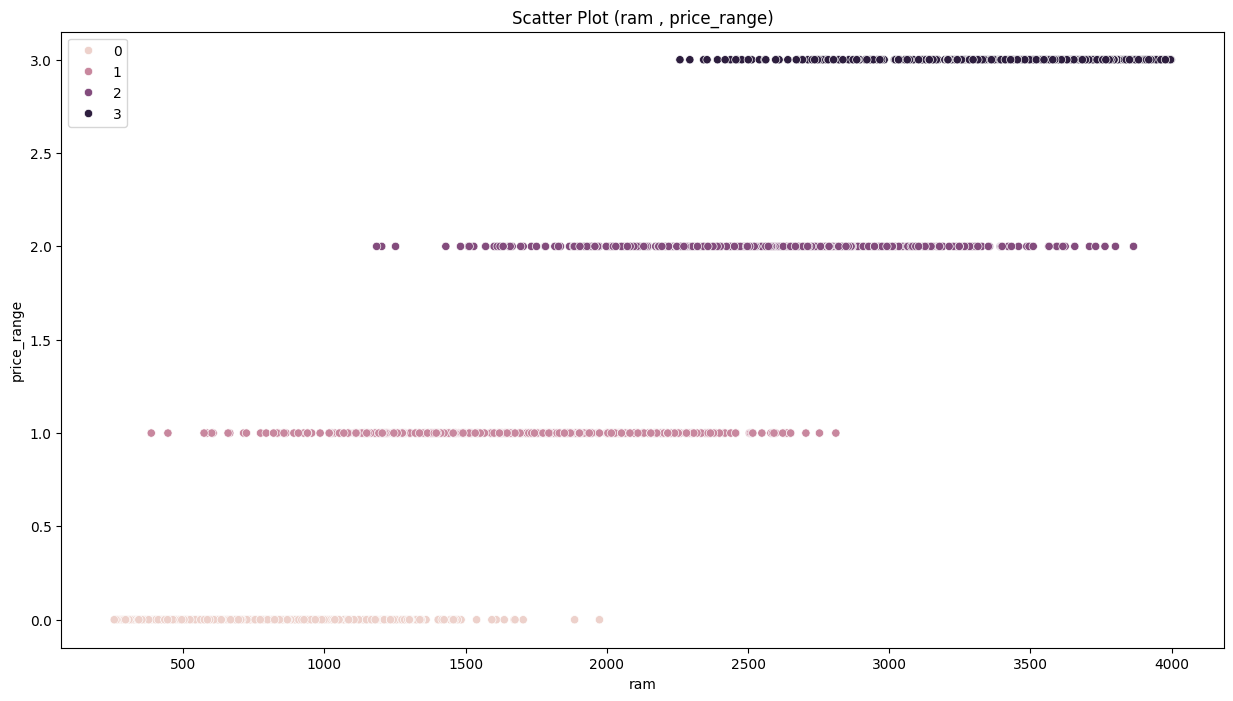

In [19]:
# we will analysise ram with price range
def scatter_plot(x , y , hue , data):
    plt.figure(1 , figsize = (15,8))
    sns.scatterplot(x = x , y = y , hue = hue , data = df)
    plt.legend()
    plt.title('Scatter Plot ({} , {})'.format(x , y))
    plt.show()
scatter_plot(x = 'ram' , y = 'price_range' , hue = 'price_range' , data = df)

<Figure size 1200x1000 with 0 Axes>

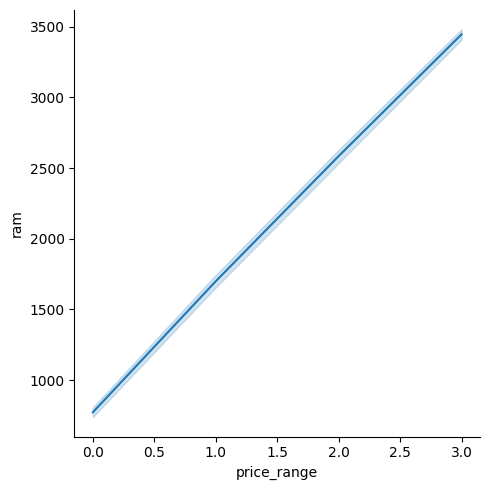

In [20]:
plt.figure(figsize=(12,10))
sns.relplot(x = 'price_range',y = 'ram',data = df,kind = 'line')

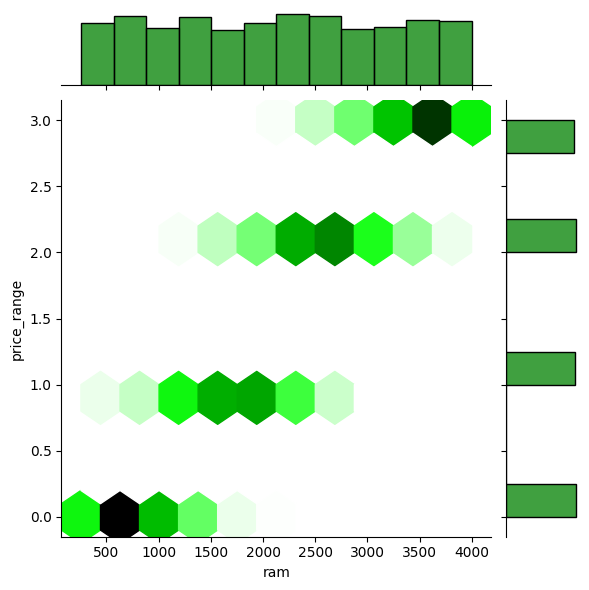

In [21]:
sns.jointplot(x='ram',y='price_range',data=df,color='green',kind='hex');

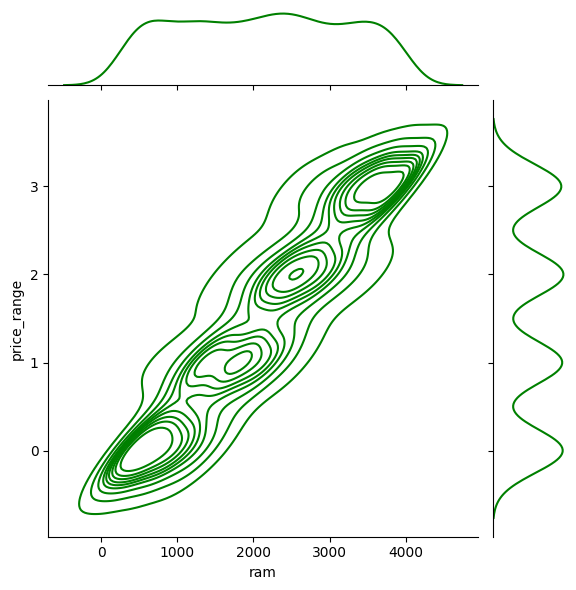

In [22]:
sns.jointplot(x='ram',y='price_range',data=df,color='green',kind='kde');

Observation:
- Ici, nous pouvons clairement visualiser la relation entre la RAM et la gamme de prix. À mesure que la taille de la RAM augmente, le prix du téléphone augmente également.

#### 4G-RAM- PRICE RANGE

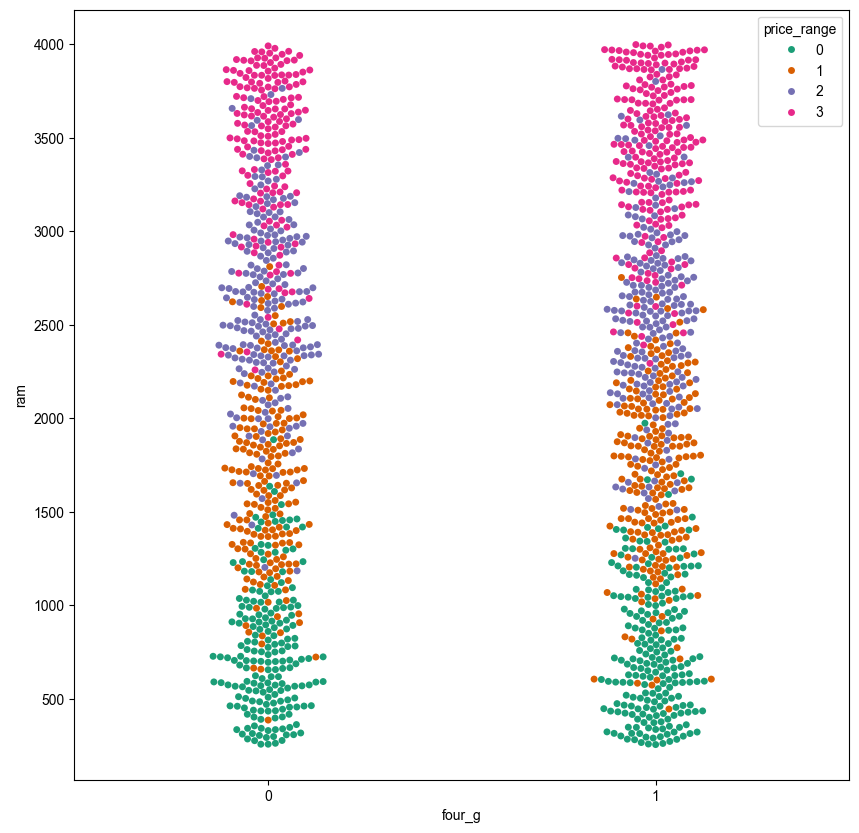

In [23]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range",
              palette="Dark2", data=df)
ax=sns.set(style="darkgrid")

#### - 3G-RAM and Price Range

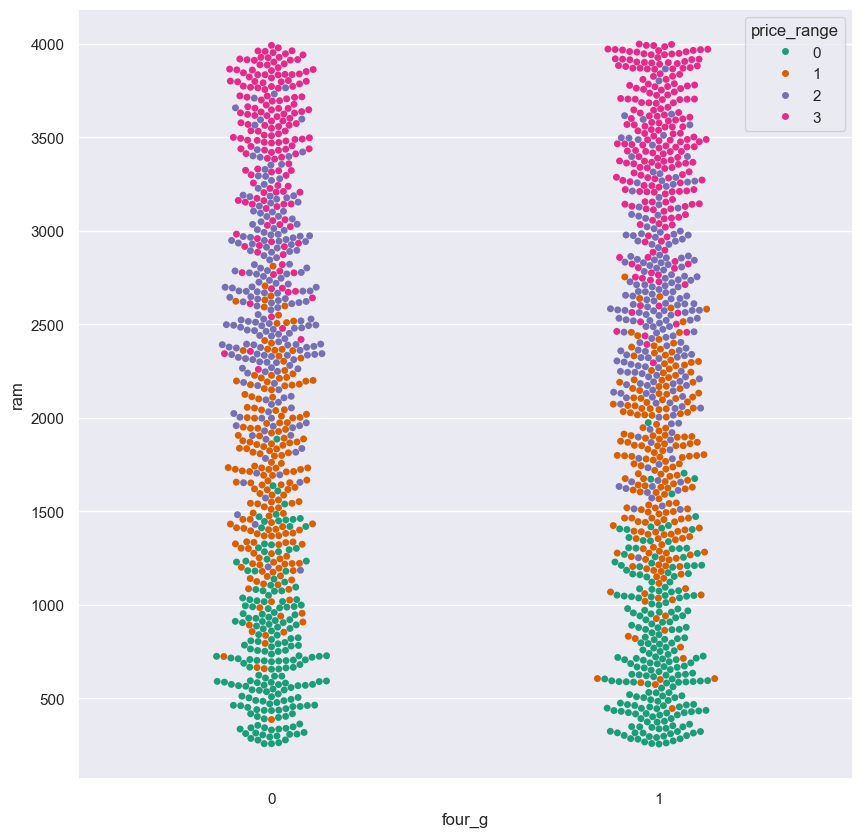

In [24]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range",
              palette="Dark2", data=df)
ax=sns.set(style="darkgrid")

#### -Battery power-RAM and Price Range

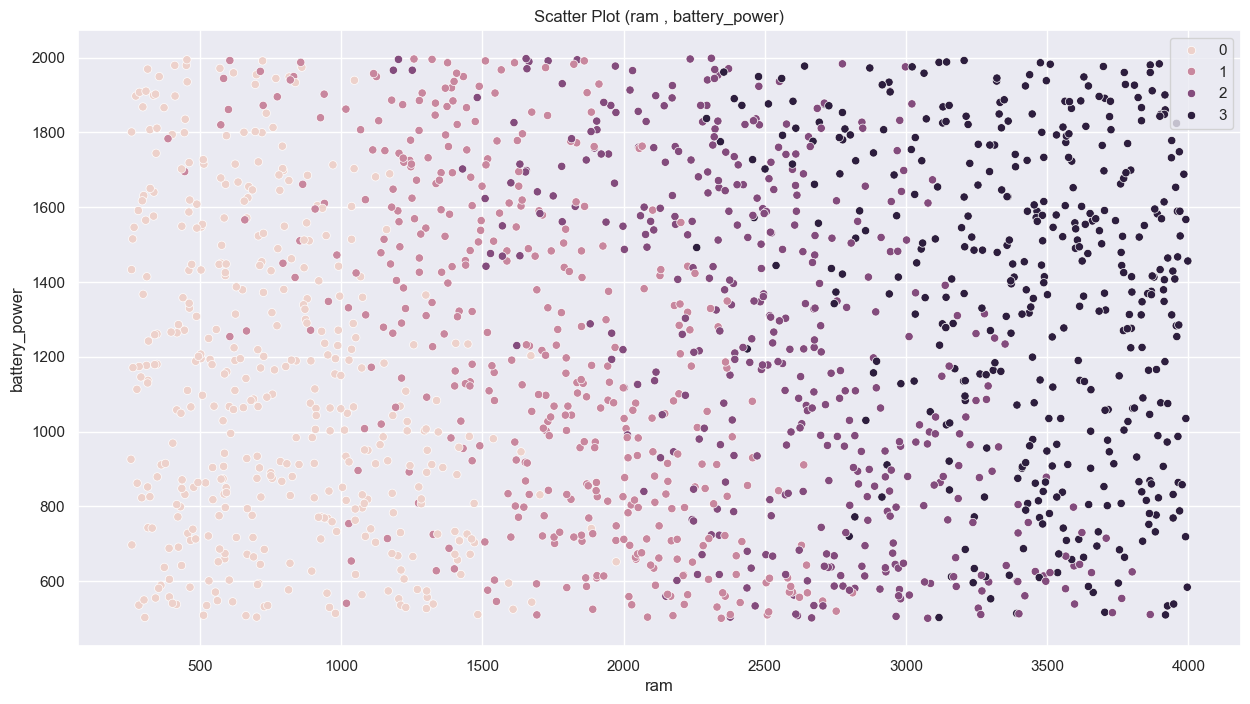

In [25]:

#compare battery power with RAM       
scatter_plot(x = 'ram' , y = 'battery_power' , hue = 'price_range' , data = df)

Observation :
- Les téléphones mobiles avec plus de 3000 Mo de RAM ont un prix plus élevé.

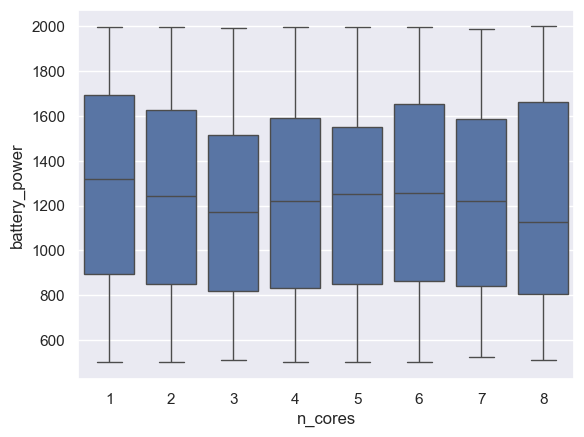

In [26]:
#compare battery power with n_cores
sns.boxplot(data=df, x=df['n_cores'], y=df['battery_power']);

#### Camera mega pixels

Text(0.5, 0, 'MegaPixels')

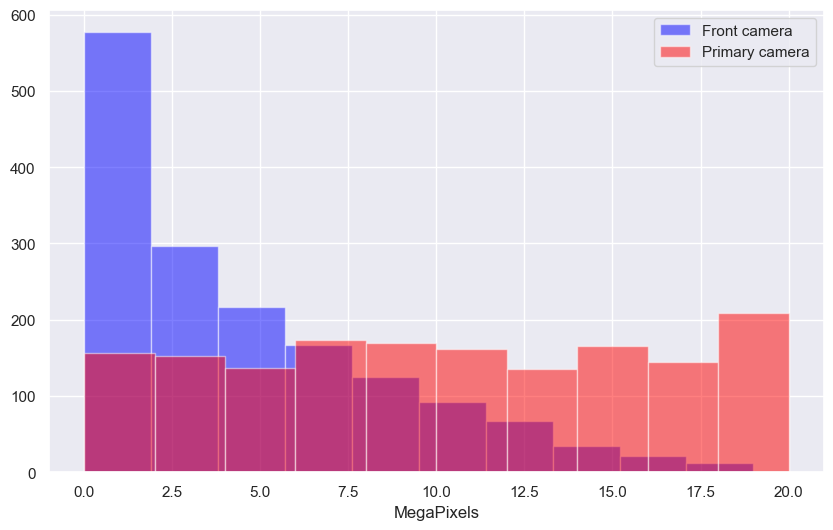

In [27]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

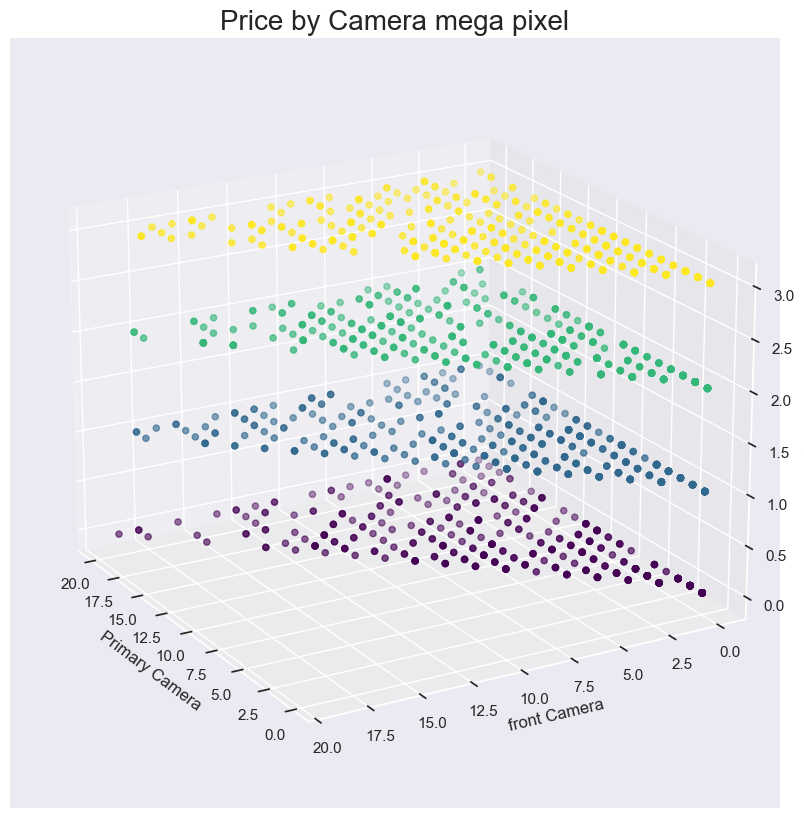

In [28]:
from matplotlib import animation 
ax = plt.figure(figsize=(10,10)).add_subplot(111, projection = '3d')

sns.set(style = "darkgrid")
x = df['pc']
y = df['fc']
z = df["price_range"]

ax.set_xlabel("Primary Camera")
ax.set_ylabel("front Camera")
ax.set_zlabel("price")
ax.set_title("Price by Camera mega pixel", fontsize=20)

ax.scatter(x, y, z, c=z ,cmap='viridis')
ax.view_init(elev=20, azim=150)

plt.show()

Observation:
- Il n'y a pas de différence significative dans la distribution des mégapixels de la caméra selon la gamme de prix.

#### pixel resolution

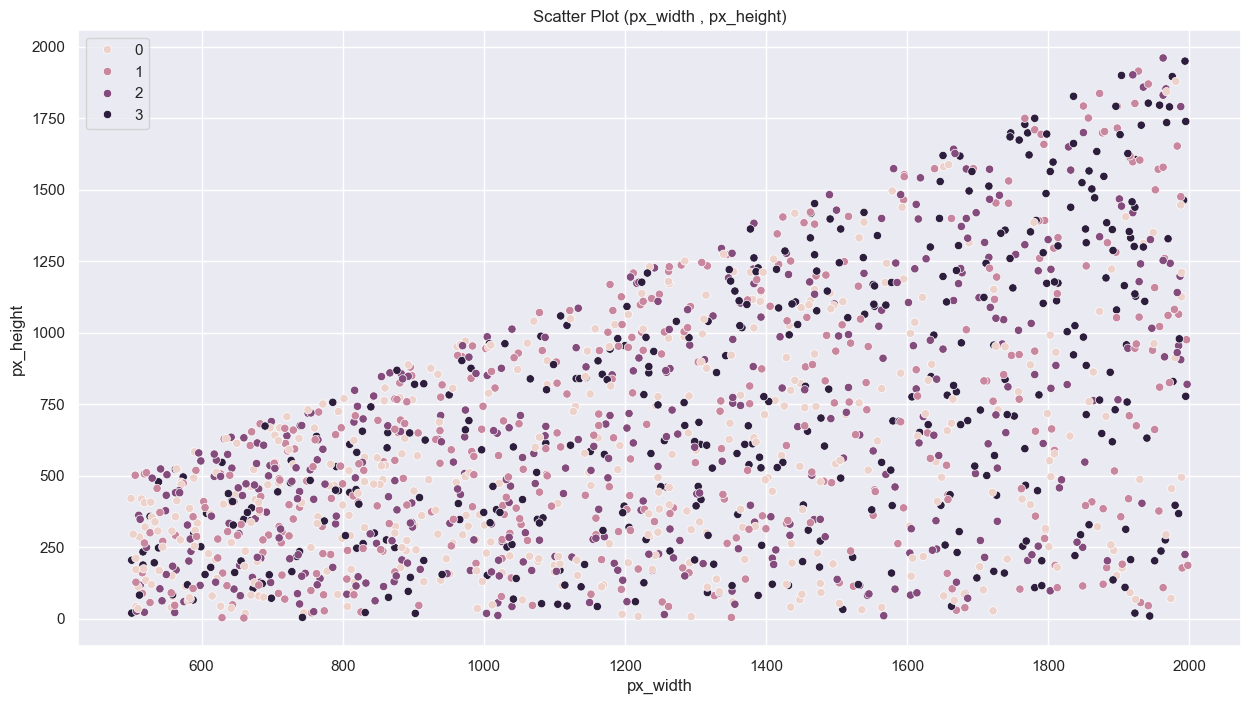

In [29]:
scatter_plot(x = 'px_width' , y = 'px_height' , hue = 'price_range' , data = df)

Observation:
- Ici, nous pouvons clairement visualiser la relation entre la largeur des pixels (px-width) et la hauteur des pixels (px-height). À mesure que la largeur des pixels augmente, la hauteur des pixels du téléphone augmente également.

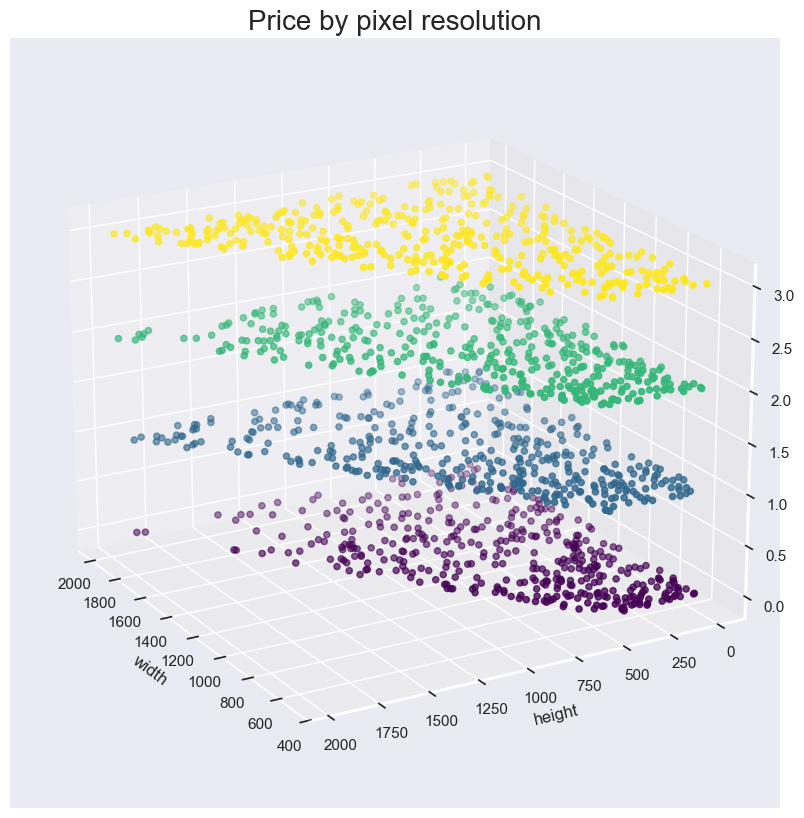

In [30]:


ax = plt.figure(figsize=(10,10)).add_subplot(111, projection = '3d')

sns.set(style = "darkgrid")
x = df['px_width']
y = df['px_height']
z = df["price_range"]

ax.set_xlabel("width")
ax.set_ylabel("height")
ax.set_zlabel("price")
ax.set_title("Price by pixel resolution", fontsize=20)

ax.scatter(x, y, z, c=z ,cmap='viridis')
ax.view_init(elev=20, azim=150)

plt.show()

Observation
- Il n'y a pas de différence significative dans la distribution de la résolution des pixels selon la gamme de prix.
- Les téléphones avec une gamme de prix de 3 ont la densité la plus élevée, distribuée du côté avec une grande hauteur et une grande largeur.

#### Screen Width & Height

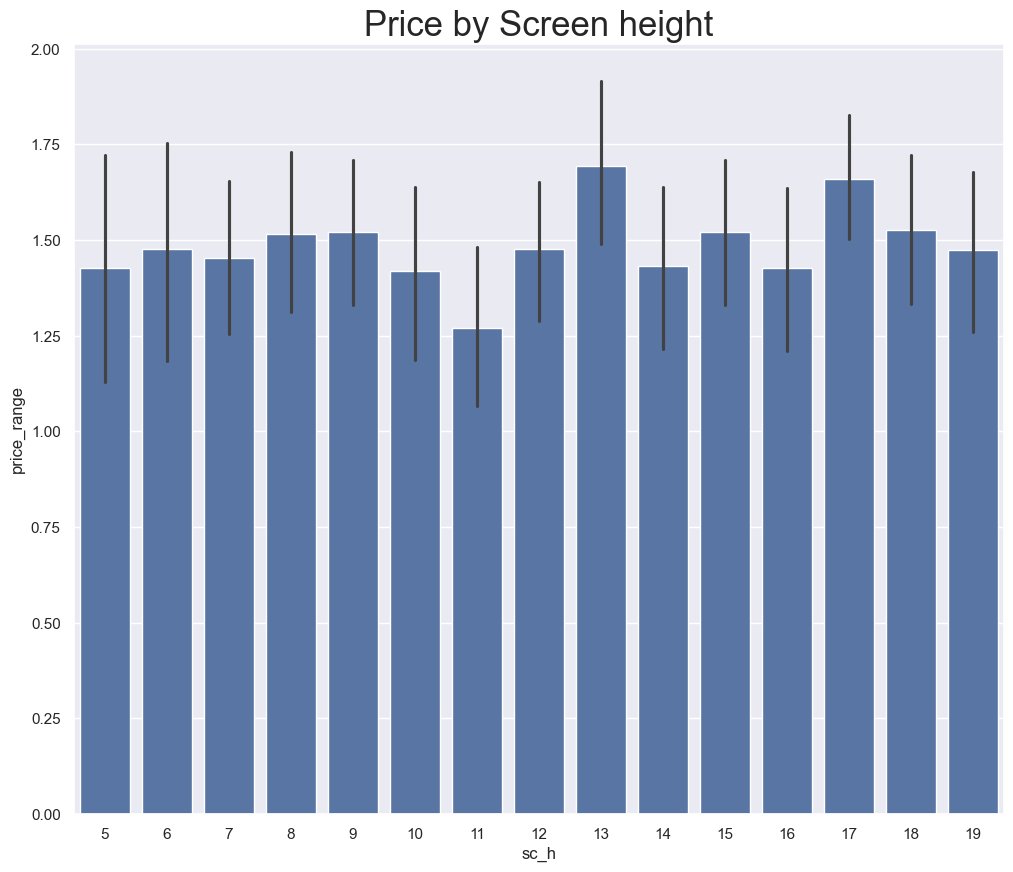

In [31]:
plt.figure(figsize=(12,10))
sns.barplot(x="sc_h", y="price_range", data=df)
plt.title("Price by Screen height", fontsize=25)
plt.show()

observation
- Il n'y a pas de différence significative dans la gamme de prix en fonction de la hauteur de l'écran.

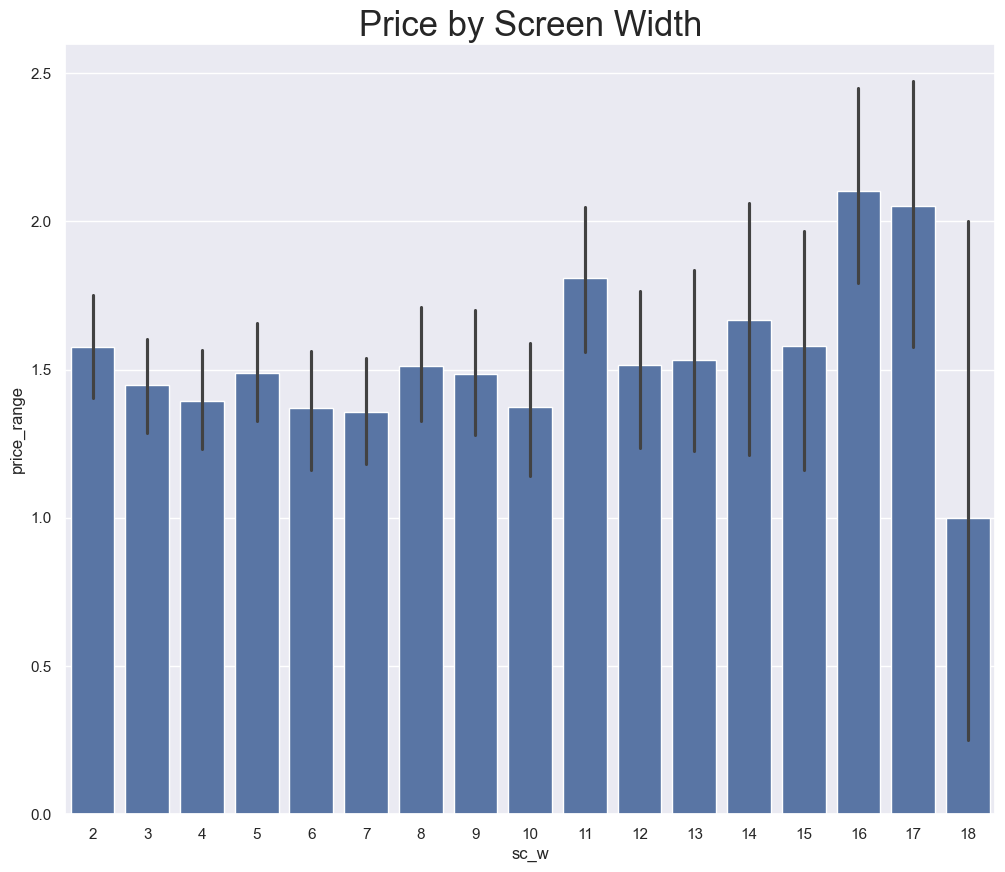

In [32]:
plt.figure(figsize=(12,10))
sns.barplot(x="sc_w", y="price_range", data=df)
plt.title("Price by Screen Width", fontsize=25)
plt.show()

observation
- Les téléphones mobiles avec une largeur d'écran de 16 et 17 sont les plus chers.
- Les téléphones mobiles avec une largeur d'écran de 18 ont une valeur significativement plus basse.

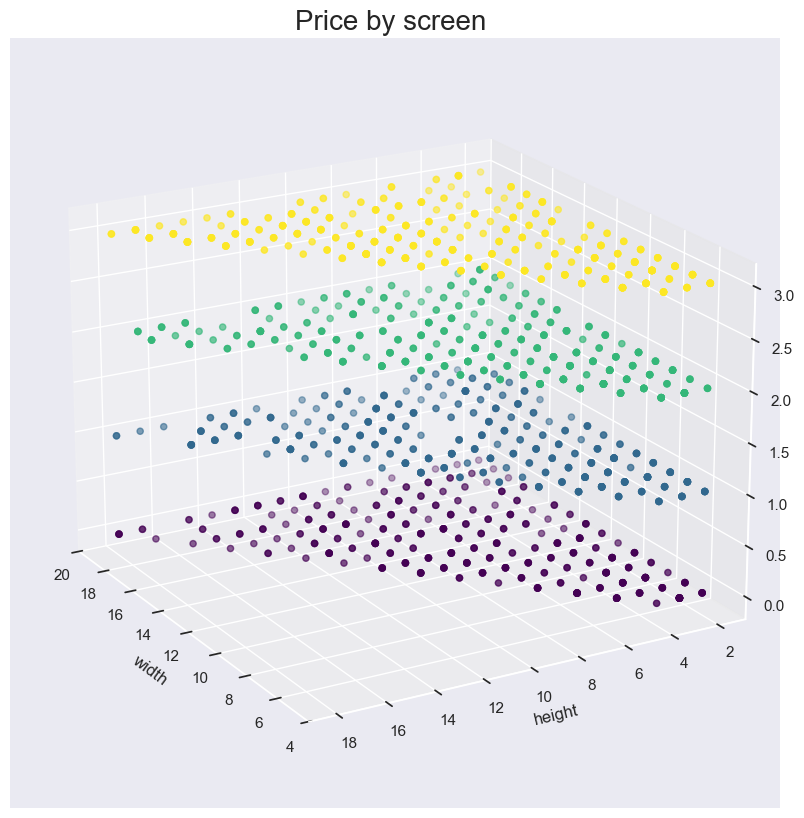

In [33]:
ax = plt.figure(figsize=(10,10)).add_subplot(111, projection = '3d')

sns.set(style = "darkgrid")
x = df['sc_h']
y = df['sc_w']
z = df["price_range"]

ax.set_xlabel("width")
ax.set_ylabel("height")
ax.set_zlabel("price")
ax.set_title("Price by screen ", fontsize=20)

ax.scatter(x, y, z, c=z ,cmap='viridis')
ax.view_init(elev=20, azim=150)

plt.show()

observation
- La différence de gamme de prix en fonction de la largeur et de la hauteur de l'écran n'est pas perceptible.

In [34]:
target_grp = df.groupby(['price_range'])

In [35]:
target_grp.describe(percentiles = [0.5])[nume_cols]

NameError: name 'nume_cols' is not defined

Observation :

- Les valeurs de la colonne "battery_power" sont presque linéairement corrélées avec les classes cibles.
- Étonnamment, la classe cible 0 a la valeur moyenne la plus élevée de "clock_speed" !
- La valeur moyenne la plus élevée de "int_memory" appartient à la classe cible 3.
- La valeur moyenne la plus basse de "mobile_wt" appartient à la classe cible 3, et cela semble raisonnable.
- La colonne "pc" est linéairement corrélée avec les classes cibles.
- La valeur moyenne la plus élevée de "px_height" appartient à la classe cible 3.
- La valeur moyenne la plus élevée de "px_width" appartient à la classe cible 3. Cela signifie que les téléphones plus chers ont un meilleur écran en termes de taille de pixels.
- Les valeurs de la colonne "ram" sont fortement et positivement corrélées avec la cible.
- La valeur moyenne de "sc_h" est plus élevée parmi les échantillons de la classe cible 3. Cependant, pour les autres classes, il n'y a pas de relation logique.

<a id="modeling"></a>
# 5️⃣ ㅣCorrelation

<Axes: >

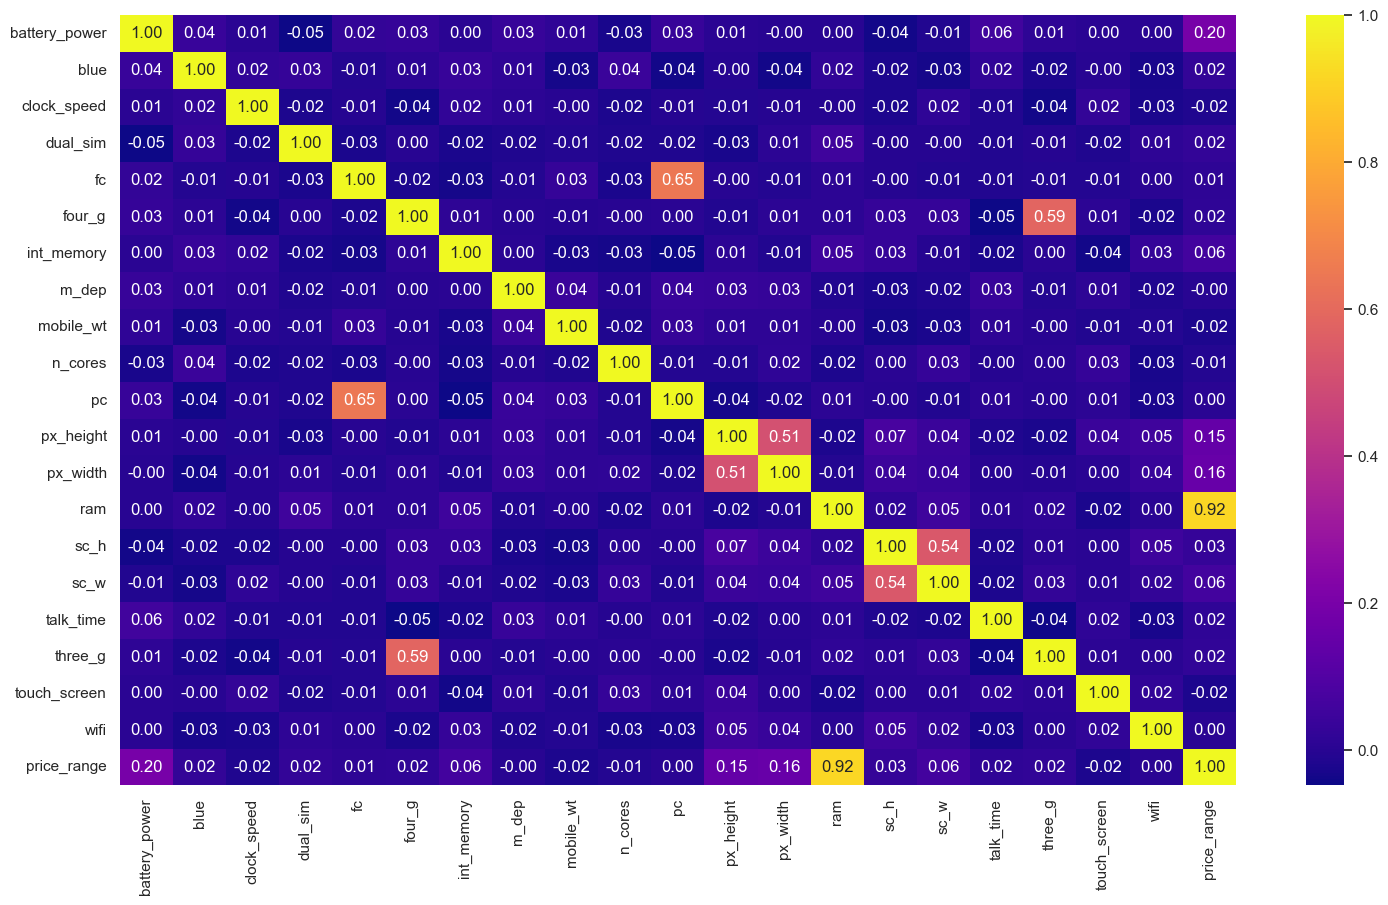

In [52]:
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), cmap= 'plasma',annot = True , fmt='.2f' )

In [53]:
# checking correlation of independent variable with dependent variable i.e personal_loan
df.corr()['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917330
battery_power    0.196288
px_width         0.155291
px_height        0.145118
int_memory       0.058975
sc_w             0.058899
sc_h             0.027184
dual_sim         0.022609
blue             0.022046
three_g          0.019767
talk_time        0.015909
four_g           0.015621
fc               0.012357
pc               0.004713
wifi             0.004313
m_dep           -0.000956
n_cores         -0.008647
clock_speed     -0.016139
touch_screen    -0.020838
mobile_wt       -0.022835
Name: price_range, dtype: float64

Observation à partir de "heatmap":
- Comme nous pouvons le voir, notre gamme de prix cible est fortement corrélée positivement avec la RAM.
- 3G et 4G
- pc (Mégapixels de la caméra principale) et fc (Mégapixels de la caméra frontale)
- px_width (Largeur de la résolution des pixels) et px_height (Hauteur de la résolution des pixels)
- sc_w (Largeur de l'écran du mobile en cm) et sc_h (Hauteur de l'écran du mobile en cm)

Ces caractéristiques sont fortement corrélées positivement. Par exemple, à mesure que la sc_w (largeur de l'écran du mobile) augmente, la sc_h (hauteur de l'écran du mobile) augmente également.

<a id="summary"></a>
# 6️⃣ㅣ Model Building

### 6.1- DECISION TREE CLASSIFIER (DTs)

In [81]:
# independant variables
X=df.drop(["price_range"],axis=1)
y = df["price_range"].values.reshape(-1,1)  #target
print('shape of X : {} \nshape of y : {}'.format(x.shape , y.shape))

shape of X : (1609,) 
shape of y : (1609, 1)


In [68]:
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[-0.89068465 -1.00811246  0.85282227 ... -1.81087143 -1.01187913
   0.9724127 ]
 [-0.48343756  0.99195282 -1.24495179 ...  0.55222032  0.98826033
  -1.02836995]
 [-1.52544409  0.99195282 -1.24495179 ...  0.55222032  0.98826033
  -1.02836995]
 ...
 [ 1.66427893  0.99195282  1.34641617 ...  0.55222032  0.98826033
   0.9724127 ]
 [ 0.63364803 -1.00811246 -0.7513579  ...  0.55222032  0.98826033
   0.9724127 ]
 [-1.64602563  0.99195282  0.60602532 ...  0.55222032  0.98826033
   0.9724127 ]]


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.1 , random_state = 42)

In [184]:
# Returning the classification metrics for multi_class probelm.
def Report(y_test , y_pred):
    print('Accuracy : {}% \n'.format(accuracy_score(y_test , y_pred)*100))
    print('Confusion Matrix : \n\n{}\n'.format(confusion_matrix(y_test , y_pred)))
    print('Classification Report : \n\n{}'.format(classification_report(y_test , y_pred)))
    
def multi_class_metrics(y_true, y_pred):
    print(f'Accuracy  : ', round(metrics.accuracy_score(y_true, y_pred), 3))
    print(f'Precision : ', round(metrics.precision_score(y_true, y_pred, average = 'micro'), 3))
    print(f'Recall    : ', round(metrics.recall_score(y_true, y_pred, average = 'micro'), 3))
    print(f'f1        : ', round(metrics.f1_score(y_true, y_pred, average = 'micro'), 3))  


In [180]:
def DTs_Model(x, y, test_size, M_depth, Criterion):
    """
    Cette fonction teste différentes configurations de l'arbre de décision
    en modifiant la taille de l'échantillon de test, la profondeur maximale
    et le critère de division. Elle retourne un DataFrame avec les résultats.
    
        Paramètres:
        - x : DataFrame des caractéristiques
        - y : Série de la variable cible
        - test_size : Liste de tailles d'échantillon de test à tester
        - M_depth : Liste de profondeurs maximales à tester
        - Criterion : Liste de critères de division à tester ('gini' ou 'entropy')
    
        Retourne:
        - evaluation : DataFrame contenant les résultats d'évaluation pour chaque combinaison de paramètres.
    """
    global x_train , x_test , y_train , y_test , y_pred
    
    rows = []
    
    for n in test_size:
        x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = n , random_state = 0)
        
        for maxDepth in M_depth:
            
            for c in Criterion:
                
                # Create Decision Tree classifer model
                DTs = DecisionTreeClassifier(max_depth = maxDepth, criterion=c)
            
                # fit model for train data
                DTs = DTs.fit(x_train,y_train)
 
                #Predict the response for test dataset
                y_pred = DTs.predict(x_test)
        
                dataset = {'Test_size': n, 'Max_depth': maxDepth, 'Criterion':c , 'acc': metrics.accuracy_score(y_test, y_pred), 'score': DTs.score(x, y)}
                rows.append(dataset)
                evaluation = pd.DataFrame(rows) 
            
                       
            
    return (evaluation)   
# We want to hightlight the maximume values
def highlight_max(s):
    """
    Cette fonction applique un fond vert aux cellules contenant la valeur maximale.
    Utilisée pour mettre en évidence la meilleure performance dans un DataFrame.
    """
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

In [181]:
evaluation = DTs_Model(x, y, [0.1, 0.15, 0.2, 0.25,0.3], np.arange(1, 20),['gini', 'entropy'])
evaluation.style.apply(highlight_max)

- test size=0.1
- max_depth=16
- Criterion= gini

In [182]:
#split X and y in training and test set in 90:10 ratio
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.1 , random_state = 0)
print('shape of x_train :',x_train.shape)
print('shape of y_train :',y_train.shape)
print('shape of x_test :',x_test.shape)
print('shape of y_test :',y_test.shape)

shape of x_train : (1448, 20)
shape of y_train : (1448, 1)
shape of x_test : (161, 20)
shape of y_test : (161, 1)


In [188]:
DTs = DecisionTreeClassifier(max_depth =16, criterion='gini',random_state = 0)
DTs = DTs.fit(x_train,y_train)
y_pred = DTs.predict(x_test)

### Evaluation

In [189]:
Report(y_test , y_pred)

Accuracy : 84.472049689441% 

Confusion Matrix : 

[[35  5  0  0]
 [ 3 29  6  0]
 [ 0  7 30  2]
 [ 0  0  2 42]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        40
           1       0.71      0.76      0.73        38
           2       0.79      0.77      0.78        39
           3       0.95      0.95      0.95        44

    accuracy                           0.84       161
   macro avg       0.84      0.84      0.84       161
weighted avg       0.85      0.84      0.85       161



In [190]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

f1 score is: 0.8413448365980012


Text(0.5, 20.049999999999997, 'Predicted label')

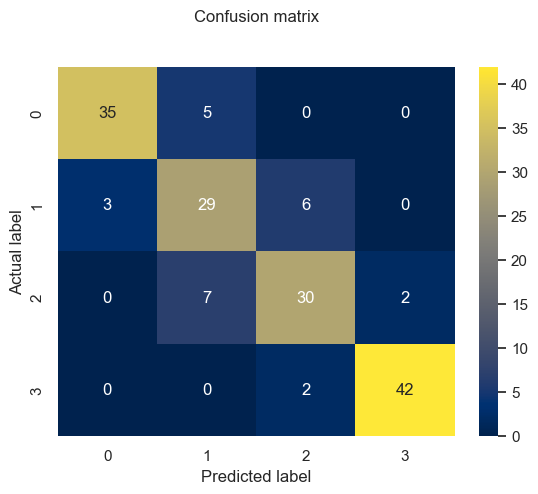

In [191]:
cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="cividis")
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

- DTs model predict 42+30+29+35= 136 samples correctly.
- DTs model predict 2+2+7+6+3+5= 25 samples uncorectly 

### - use cross validation

In [192]:
def Perform_cross_val(model, k, x, y, scoring):
    """
    perform cross validation
        model: model
        k(scaler): the value for n_splits in KFold()
        x(DataFrame or array):  x_train
        y(DataFrame or array): y_train
        scoring(string): an approach for evaluation in cross validation
    """

    kf = StratifiedKFold(n_splits=k)
    cv_results = cross_val_score(model, x, y.ravel(), cv=kf, scoring=scoring)
    cv_mean = np.mean(cv_results)
    
    print('-'*20, f"CV for k={k}, scoring={scoring}", '-'*20)
    print(f"CV mean: {cv_mean}")
    print(f"CV results: {cv_results}\n")

In [193]:
# Charger un jeu de données d'exemple (Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Séparer les données en ensemble d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du pipeline
pipe1 = Pipeline([('scaler', MinMaxScaler()), ('DTs', DecisionTreeClassifier())])

# Fonction pour effectuer la validation croisée et calculer la précision (accuracy)
def Perform_cross_val(pipe, k, x, y, scoring):
    scores = cross_val_score(pipe, x, y, cv=k, scoring=scoring)
    print(f"Cross-validation scores: {scores}")
    print(f"Mean score: {scores.mean()}")

# Appliquer la validation croisée avec k=5
Perform_cross_val(pipe1, k=5, x=x_train, y=y_train, scoring='accuracy')


Cross-validation scores: [0.95833333 1.         0.83333333 0.95833333 0.95833333]
Mean score: 0.9416666666666668


- scores of all fold are good.

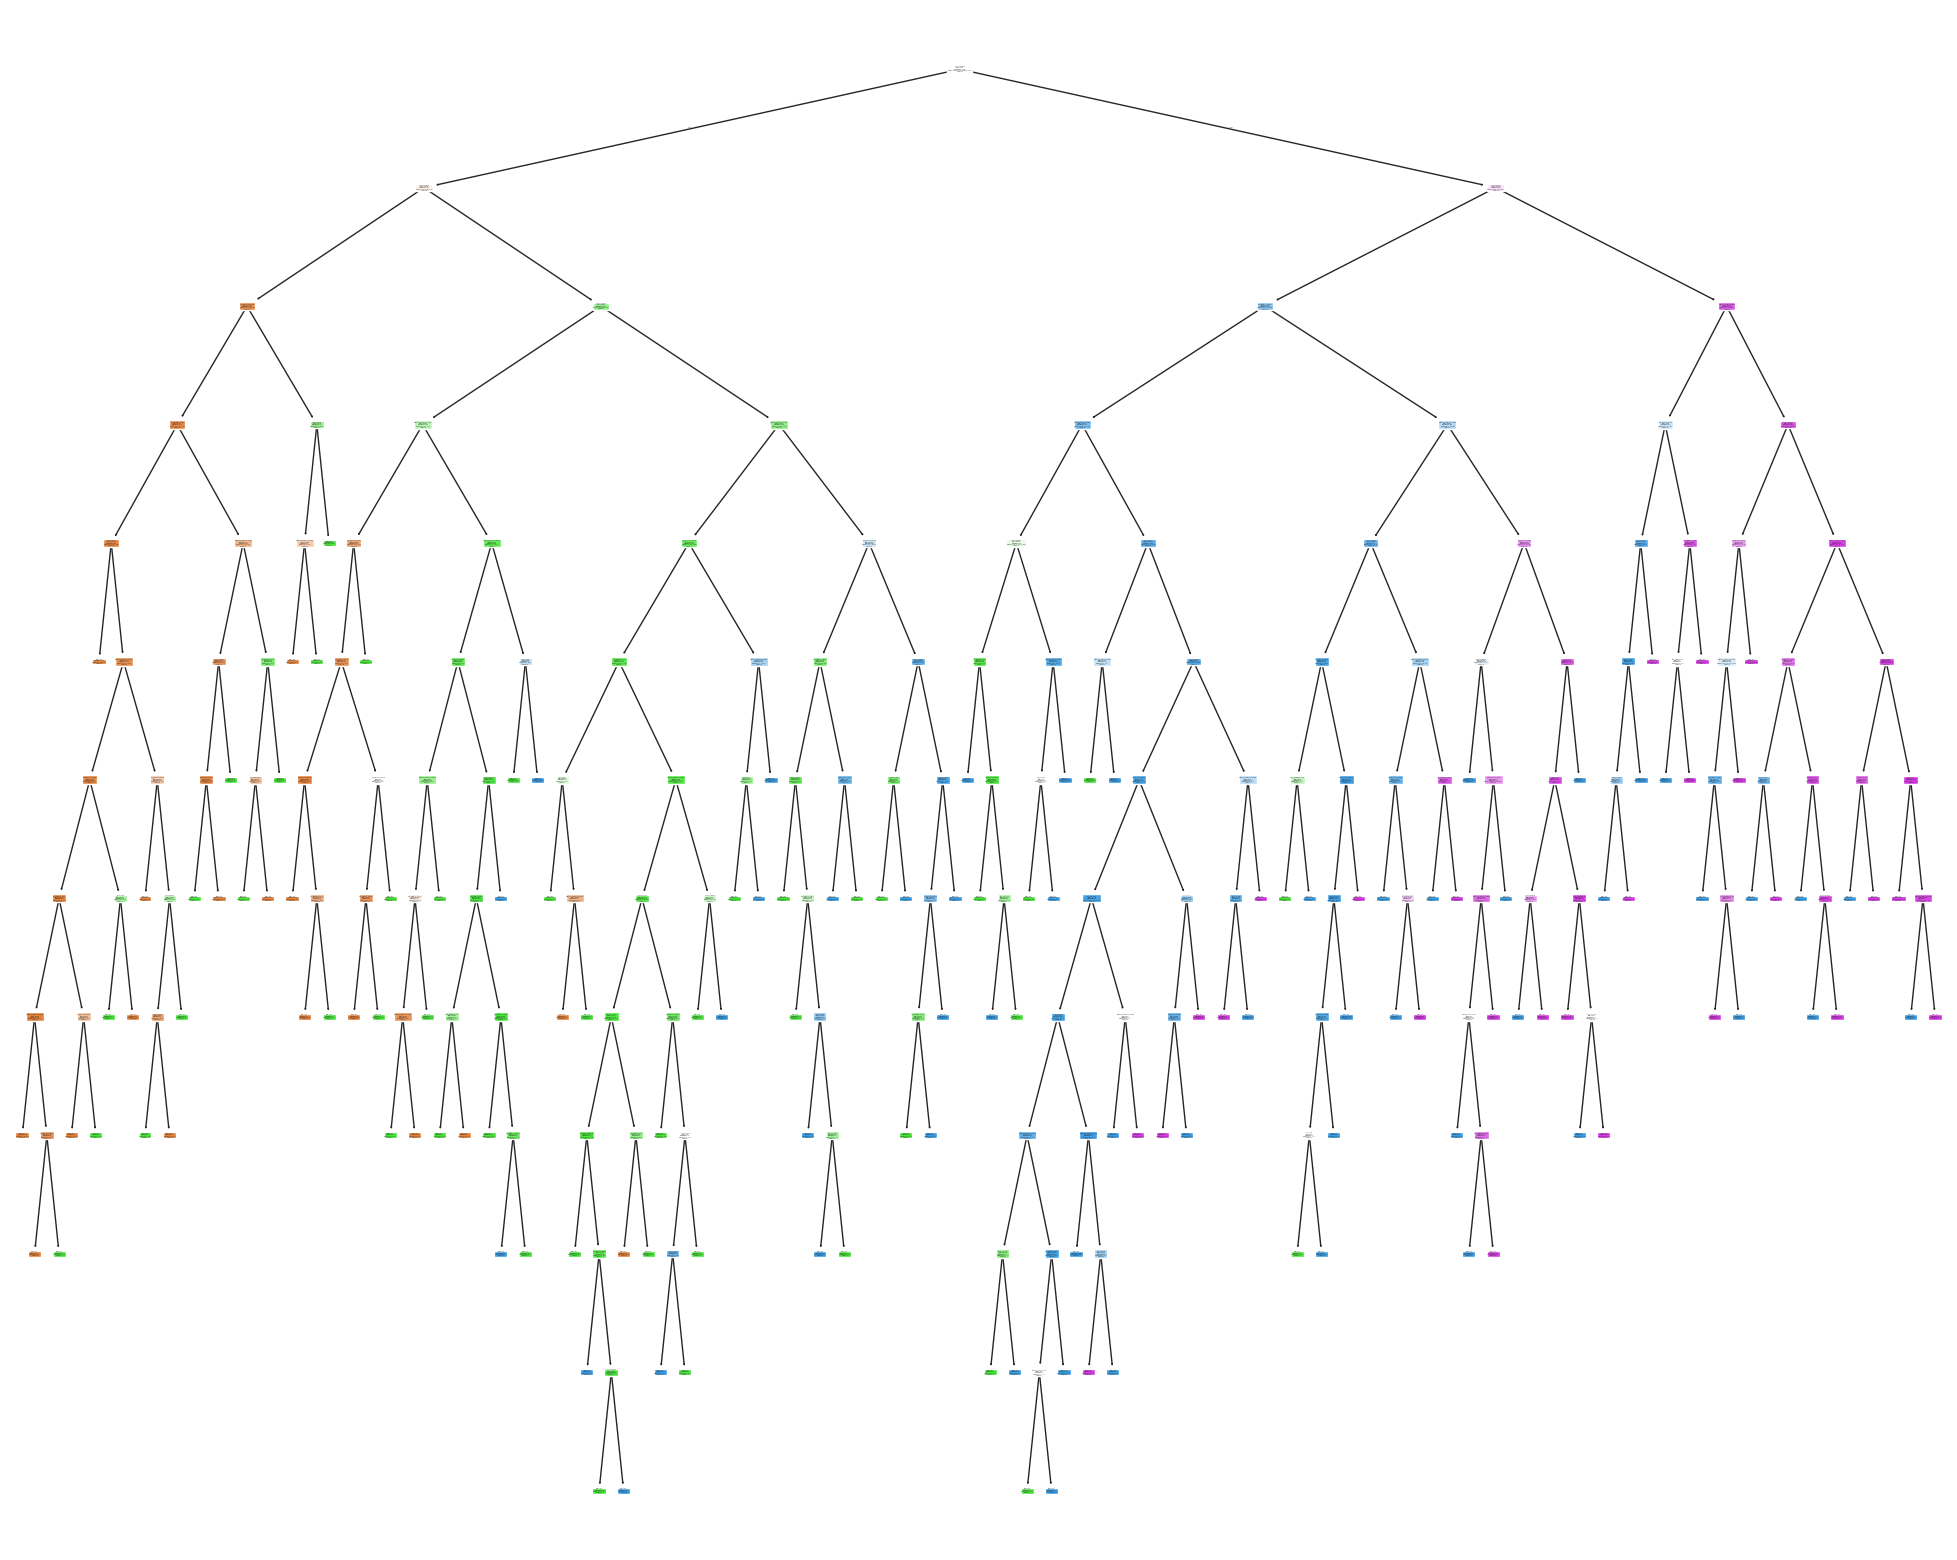

In [194]:
# visualizing tree
from sklearn import tree
feature_names = x.columns
target_names = ['0', '1','2','3']
fig = plt.figure(figsize=(25,20))
plot= tree.plot_tree (DTs,
                     feature_names=feature_names,
                     class_names=target_names,
                     filled=True) 
plt.show()

In [72]:
importances = DTs2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

NameError: name 'DTs2' is not defined

### 5.2- RANDOM FOREST (RF)

In [104]:
# independant variables
x=df.drop(["price_range"],axis=1)
y = df["price_range"].values.reshape(-1,1)  #target
print('shape of x : {} \nshape of y : {}'.format(x.shape , y.shape))

shape of x : (1609, 20) 
shape of y : (1609, 1)


In [105]:
def RF_Model(x, y, testSize, n_estimators, Criterion):

    global x_train , x_test , y_train , y_test , y_pred
    
    rows = []
    
    for n in testSize:
        x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = n , random_state = 0)
        
        for max_estimator in n_estimators:
            
            for c in Criterion:
                
                # Create Random Forest classifer object
                RF = RandomForestClassifier(n_estimators = max_estimator, criterion=c)
            
                # fit on Train  Random Forest Classifer
                RF = RF.fit(x_train,y_train.ravel())
 
                #Predict test data
                y_pred = RF.predict(x_test)
        
                dataset= {'Test_size': n, 'n_estimators': max_estimator, 'Criterion':c , 'acc': metrics.accuracy_score(y_test, y_pred), 'score': RF.score(x, y)}
                rows.append(dataset)
                evaluation2 = pd.DataFrame(rows)            
            
    return (evaluation2)   
# We want to hightlight the maximume values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

In [106]:
evaluation2 = RF_Model(x, y, [0.1, 0.15, 0.2, 0.25,0.3], [50, 100, 170, 200, 300, 400], ['gini', 'entropy'])
evaluation2.style.apply(highlight_max1)

- test size=0.1
- n_estimators=170
- Criterion= gini

In [107]:
#split X and y in training and test set in 90:10 ratio
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.1 , random_state = 0)
print('shape of x_train :',x_train.shape)
print('shape of y_train :',y_train.shape)
print('shape of x_test :',x_test.shape)
print('shape of y_test :',y_test.shape)

shape of x_train : (1448, 20)
shape of y_train : (1448, 1)
shape of x_test : (161, 20)
shape of y_test : (161, 1)


In [108]:
# n_estimators=100
# Criterion= gini
RF = RandomForestClassifier(n_estimators=170, criterion='gini',random_state = 0)
RF = RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)

### Evaluation

In [109]:
Report(y_test , y_pred)

Accuracy : 92.54658385093167% 

Confusion Matrix : 

[[38  2  0  0]
 [ 3 33  2  0]
 [ 0  3 35  1]
 [ 0  0  1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.87      0.87      0.87        38
           2       0.92      0.90      0.91        39
           3       0.98      0.98      0.98        44

    accuracy                           0.93       161
   macro avg       0.92      0.92      0.92       161
weighted avg       0.93      0.93      0.93       161



In [110]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

f1 score is: 0.9232640734833717


- According to confusion matrix model knows yellow boxes wrong. 

- RF model predict 43+35+33+38= 149 samples correctly.
- RF model predict 1+1+3+2+3+2= 12 samples uncorectly 

### - use cross validation

# KNN

C:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected

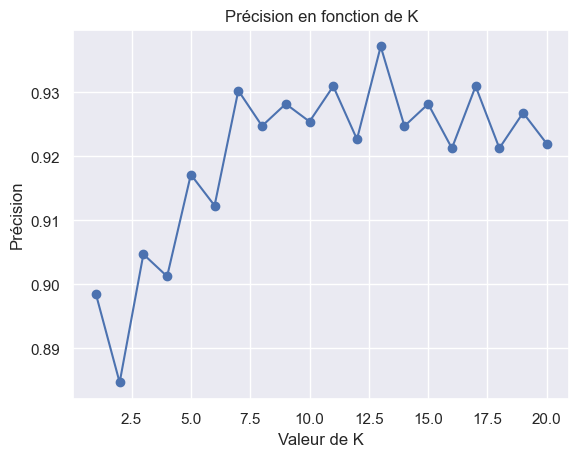

In [91]:
from sklearn.neighbors import KNeighborsClassifier
# Liste des valeurs de K à tester
k_range = range(1, 21)

# Stocker les scores pour chaque K
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy'))
    scores.append(score)

# Affichage des résultats
plt.plot(k_range, scores, marker='o')
plt.xlabel("Valeur de K")
plt.ylabel("Précision")
plt.title("Précision en fonction de K")
plt.show()

In [98]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)

C:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Text(0.5, 20.049999999999997, 'Predicted label')

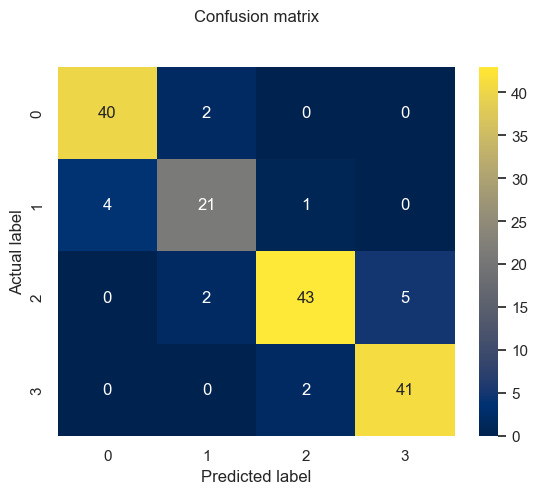

In [99]:
cf_matrix = confusion_matrix(y_test, y_pred1)

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="cividis")
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [100]:
#Accuracy
print("La précision du model")
print(accuracy_score(y_test, y_pred1) * 100, '%')

La précision du model
90.06211180124224 %


# Decision Tree Classifier

In [86]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred2 = tree.predict(X_test)

Text(0.5, 20.049999999999997, 'Predicted label')

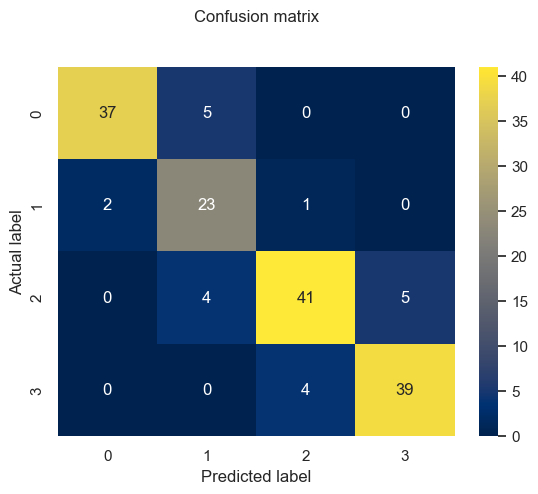

In [87]:
cf_matrix2 = confusion_matrix(y_test, y_pred2)

sns.heatmap(pd.DataFrame(cf_matrix2), annot=True, cmap="cividis")
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [88]:
#Accuracy
print("La précision du model")
print(accuracy_score(y_test, y_pred2) * 100, '%')

La précision du model
86.95652173913044 %


In [101]:
# Sauvegarde du modèle entraîné
with open("model1.pkl", "wb") as file:
    pickle.dump(knn, file)

In [66]:
import pickle

In [102]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

InvalidIndexError: (0, slice(None, None, None))